# read data

In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/data/UNSW_NB15_freq_scaled.csv')
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,-0.188346,0.477508,0.548451,0.4547,-0.101342,-0.129612,-0.047849,-0.097232,-0.568650,0.702512,...,-0.520051,-0.658496,-0.110419,-0.110372,-0.193597,-0.690790,-0.746782,-0.120335,0.360923,0
1,-0.099897,0.477508,0.548451,0.4547,-0.042496,0.173998,-0.045110,0.188966,-0.568623,-1.151363,...,-0.520051,-0.568574,-0.110419,-0.110372,-0.193597,-0.690790,-0.287000,-0.120335,0.360923,0
2,0.063006,0.477508,0.548451,0.4547,-0.086630,-0.022456,-0.047239,-0.008217,-0.569024,-1.151363,...,-0.520051,-0.478652,-0.110419,-0.110372,-0.193597,-0.571689,-0.287000,-0.120335,0.360923,0
3,0.072800,0.477508,0.019327,0.4547,-0.057207,-0.058174,-0.045720,-0.093142,-0.569027,-1.151363,...,-0.520051,-0.478652,8.503550,8.479151,-0.193597,-0.571689,-0.746782,-0.120335,0.360923,0
4,-0.133449,0.477508,0.548451,0.4547,-0.071919,-0.111753,-0.046261,-0.096576,-0.568904,0.722026,...,-0.520051,2.848467,-0.110419,-0.110372,-0.193597,-0.571689,2.747558,-0.120335,0.360923,0


# features information

In [ ]:
df_features = pd.read_csv('/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/data/NUSW-NB15_features.csv', encoding='latin1')
# Set display options to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

display(df_features)

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,"Indicates to the state and its dependent protocol, e.g. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR, REQ, RST, TST, TXD, URH, URN, and (-) (if not used state)"
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


# culingam on benign traffic

## drop malicious traffic

In [ ]:
df_benign = df[df['label'] == 0]
df_benign = df_benign.drop(columns=['attack_cat'])
df_benign.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,-0.188346,0.477508,0.548451,0.4547,-0.101342,-0.129612,-0.047849,-0.097232,-0.568650,0.702512,1.500906,-0.380090,-0.269328,-0.074561,-0.125576,-0.128285,-0.082757,-0.109906,-0.145140,1.046159,-0.280999,0.880021,1.066927,-0.495523,-0.439166,-0.489097,-0.459634,-0.309595,-0.143883,-0.039675,-0.774092,-1.335262,-0.617890,-0.519345,-0.520051,-0.658496,-0.110419,-0.110372,-0.193597,-0.690790,-0.746782,-0.120335,0
1,-0.099897,0.477508,0.548451,0.4547,-0.042496,0.173998,-0.045110,0.188966,-0.568623,-1.151363,1.483170,-0.380121,-0.064104,-0.044061,0.190985,-0.124584,-0.076306,-0.109269,0.204961,1.046159,0.301043,1.521469,1.066927,-0.495523,-0.439166,-0.489097,-0.415924,3.874777,-0.143883,-0.039675,3.104137,-0.327500,-0.617890,-0.519345,-0.520051,-0.568574,-0.110419,-0.110372,-0.193597,-0.690790,-0.287000,-0.120335,0
2,0.063006,0.477508,0.548451,0.4547,-0.086630,-0.022456,-0.047239,-0.008217,-0.569024,-1.151363,1.483170,-0.380158,-0.247593,-0.059311,-0.013848,-0.098297,0.003493,0.239836,2.757830,1.046159,0.811549,1.437684,1.066927,0.708860,0.701982,0.612900,-0.445064,2.764718,-0.143883,-0.039675,-0.220060,-0.327500,-0.495547,-0.519345,-0.520051,-0.478652,-0.110419,-0.110372,-0.193597,-0.571689,-0.287000,-0.120335,0
3,0.072800,0.477508,0.019327,0.4547,-0.057207,-0.058174,-0.045720,-0.093142,-0.569027,-1.151363,1.483170,-0.380152,-0.271458,-0.059311,-0.069712,-0.109709,-0.007934,-0.105238,1.121977,1.046159,0.073841,0.033103,1.066927,-0.495523,-0.439166,-0.489097,-0.415924,-0.226931,-0.143883,-0.039675,-0.774092,-0.327500,-0.495547,-0.519345,-0.520051,-0.478652,8.503550,8.479151,-0.193597,-0.571689,-0.746782,-0.120335,0
4,-0.133449,0.477508,0.548451,0.4547,-0.071919,-0.111753,-0.046261,-0.096576,-0.568904,0.722026,1.483170,-0.380121,-0.271197,-0.044061,-0.106955,-0.124896,-0.021257,-0.061254,-0.118684,1.046159,1.045493,0.714772,1.066927,0.886283,0.881887,0.761358,-0.411067,-0.301722,-0.143883,-0.039675,3.104137,-0.327500,-0.495547,-0.396808,-0.520051,2.848467,-0.110419,-0.110372,-0.193597,-0.571689,2.747558,-0.120335,0


In [ ]:
df_benign.shape

(93000, 43)

In [ ]:
df_benign_features = df_benign.drop(columns=['label'])
df_benign_features.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,-0.188346,0.477508,0.548451,0.4547,-0.101342,-0.129612,-0.047849,-0.097232,-0.568650,0.702512,1.500906,-0.380090,-0.269328,-0.074561,-0.125576,-0.128285,-0.082757,-0.109906,-0.145140,1.046159,-0.280999,0.880021,1.066927,-0.495523,-0.439166,-0.489097,-0.459634,-0.309595,-0.143883,-0.039675,-0.774092,-1.335262,-0.617890,-0.519345,-0.520051,-0.658496,-0.110419,-0.110372,-0.193597,-0.690790,-0.746782,-0.120335
1,-0.099897,0.477508,0.548451,0.4547,-0.042496,0.173998,-0.045110,0.188966,-0.568623,-1.151363,1.483170,-0.380121,-0.064104,-0.044061,0.190985,-0.124584,-0.076306,-0.109269,0.204961,1.046159,0.301043,1.521469,1.066927,-0.495523,-0.439166,-0.489097,-0.415924,3.874777,-0.143883,-0.039675,3.104137,-0.327500,-0.617890,-0.519345,-0.520051,-0.568574,-0.110419,-0.110372,-0.193597,-0.690790,-0.287000,-0.120335
2,0.063006,0.477508,0.548451,0.4547,-0.086630,-0.022456,-0.047239,-0.008217,-0.569024,-1.151363,1.483170,-0.380158,-0.247593,-0.059311,-0.013848,-0.098297,0.003493,0.239836,2.757830,1.046159,0.811549,1.437684,1.066927,0.708860,0.701982,0.612900,-0.445064,2.764718,-0.143883,-0.039675,-0.220060,-0.327500,-0.495547,-0.519345,-0.520051,-0.478652,-0.110419,-0.110372,-0.193597,-0.571689,-0.287000,-0.120335
3,0.072800,0.477508,0.019327,0.4547,-0.057207,-0.058174,-0.045720,-0.093142,-0.569027,-1.151363,1.483170,-0.380152,-0.271458,-0.059311,-0.069712,-0.109709,-0.007934,-0.105238,1.121977,1.046159,0.073841,0.033103,1.066927,-0.495523,-0.439166,-0.489097,-0.415924,-0.226931,-0.143883,-0.039675,-0.774092,-0.327500,-0.495547,-0.519345,-0.520051,-0.478652,8.503550,8.479151,-0.193597,-0.571689,-0.746782,-0.120335
4,-0.133449,0.477508,0.548451,0.4547,-0.071919,-0.111753,-0.046261,-0.096576,-0.568904,0.722026,1.483170,-0.380121,-0.271197,-0.044061,-0.106955,-0.124896,-0.021257,-0.061254,-0.118684,1.046159,1.045493,0.714772,1.066927,0.886283,0.881887,0.761358,-0.411067,-0.301722,-0.143883,-0.039675,3.104137,-0.327500,-0.495547,-0.396808,-0.520051,2.848467,-0.110419,-0.110372,-0.193597,-0.571689,2.747558,-0.120335


In [ ]:
df_benign_features.shape

(93000, 42)

## index mapping

In [ ]:
df_list = df_benign_features.columns.to_list()
df_dict = {}

for i, column in zip(range(len(df_list)), df_list):
    df_dict[column] = i

print(len(df_list))
print(df_dict)

42
{'dur': 0, 'proto': 1, 'service': 2, 'state': 3, 'spkts': 4, 'dpkts': 5, 'sbytes': 6, 'dbytes': 7, 'rate': 8, 'sttl': 9, 'dttl': 10, 'sload': 11, 'dload': 12, 'sloss': 13, 'dloss': 14, 'sinpkt': 15, 'dinpkt': 16, 'sjit': 17, 'djit': 18, 'swin': 19, 'stcpb': 20, 'dtcpb': 21, 'dwin': 22, 'tcprtt': 23, 'synack': 24, 'ackdat': 25, 'smean': 26, 'dmean': 27, 'trans_depth': 28, 'response_body_len': 29, 'ct_srv_src': 30, 'ct_state_ttl': 31, 'ct_dst_ltm': 32, 'ct_src_dport_ltm': 33, 'ct_dst_sport_ltm': 34, 'ct_dst_src_ltm': 35, 'is_ftp_login': 36, 'ct_ftp_cmd': 37, 'ct_flw_http_mthd': 38, 'ct_src_ltm': 39, 'ct_srv_dst': 40, 'is_sm_ips_ports': 41}


## culingam

In [ ]:
!pip install lingam
!pip -q install cupy-cuda12x  # pick the right CUDA build for your runtime
!pip -q install git+https://github.com/aknvictor/culingam.git
!pip -q install joblib tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 10.3 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=9f22a216a914f967db56e86b618103a0a5c03dac555d0a660246def465d41fb4
  Stored in directory: /root/.cache/pip/wheels/c6/24/8b/be911b059a61f490f38425eb19bf2fed470a5ead97228e8255
Successfully built semopy
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


100%|██████████| 42/42 [00:23<00:00,  1.81it/s]


Causal ordering: [np.int32(29), np.int32(37), np.int32(36), np.int32(28), np.int32(38), np.int32(11), np.int32(8), np.int32(17), np.int32(18), np.int32(16), np.int32(12), np.int32(7), np.int32(0), np.int32(15), np.int32(41), np.int32(34), np.int32(27), np.int32(33), np.int32(35), np.int32(26), np.int32(22), np.int32(21), np.int32(20), np.int32(19), np.int32(1), np.int32(14), np.int32(6), np.int32(4), np.int32(2), np.int32(13), np.int32(30), np.int32(40), np.int32(32), np.int32(39), np.int32(10), np.int32(24), np.int32(25), np.int32(3), np.int32(31), np.int32(5), np.int32(9), np.int32(23)]

Adjacency matrix:
 [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.00825062  0.          0.         ...  0.          0.
  -0.03744041]
 [ 0.0025995  -0.33470183  0.         ...  0.          0.
   0.00512467]
 ...
 [ 0.00751241  0.38231574 -0.25230886 ...  0.         -0.1709212
   0.        ]
 [ 0.          0.2506319   0.30541494 ...  0.          0.
  -0.00871345]
 [-0.06

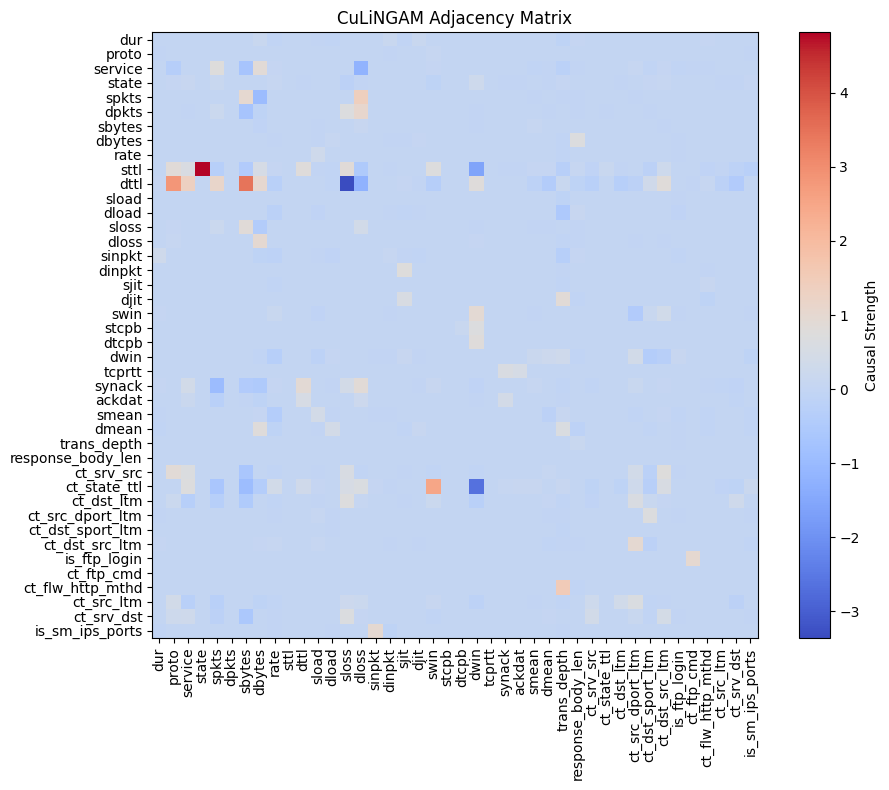

In [ ]:
import lingam
from culingam.directlingam import DirectLiNGAM as CuLiNGAM
from lingam.utils import make_dot
import matplotlib.pyplot as plt

# ==== 1. Initialize CuLiNGAM ====
model = CuLiNGAM(
    random_state=42,
    measure='pwling',          # Pairwise LiNGAM measure
    #prior_knowledge=prior_knowledge  # Optional: matrix with constraints
)

# ==== 2. Fit the model ====
model.fit(df_benign_features)

# ==== 3. Results ====
print("Causal ordering:", model.causal_order_)
print("\nAdjacency matrix:\n", model.adjacency_matrix_)

# ==== 4. Visualization ====
dot = make_dot(model.adjacency_matrix_, labels=list(df_benign_features.columns))
dot.format = 'png'
dot.render("/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/benign_culingam_graph", cleanup=True)
dot.view()

print("\nGraph saved as 'benign_culingam_graph.png'")

# ==== 5. Plot adjacency heatmap ====
plt.figure(figsize=(10, 8))
plt.imshow(model.adjacency_matrix_, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Causal Strength')
plt.xticks(range(len(df_benign_features.columns)), df_benign_features.columns, rotation=90)
plt.yticks(range(len(df_benign_features.columns)), df_benign_features.columns)
plt.title("CuLiNGAM Adjacency Matrix")
plt.tight_layout()
plt.show()

### saving adjacency matrix

In [ ]:
import numpy as np
import pandas as pd

# Convert to DataFrame with column/row labels
adj_df = pd.DataFrame(
    model.adjacency_matrix_,
    index=df_benign_features.columns,
    columns=df_benign_features.columns
)

# Save to CSV
adj_df.to_csv("/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/benign_culingam_adjacency_matrix_gpu.csv")

# Save as NumPy binary (faster for loading in Python later)
np.save("benign_culingam_adjacency_matrix.npy", model.adjacency_matrix_)

print("\nAdjacency matrix saved as:")
print(" - culingam_adjacency_matrix.csv (human-readable)")
print(" - culingam_adjacency_matrix.npy (fast Python load)")


Adjacency matrix saved as:
 - culingam_adjacency_matrix.csv (human-readable)
 - culingam_adjacency_matrix.npy (fast Python load)


### save causal order

In [ ]:
import json
# Save the causal order as a JSON file for easy readability
output_dir = "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/"
causal_order_path = f"{output_dir}benign_causal_order.json"
feature_names = list(df_benign_features.columns)

try:
    causal_order_names = [feature_names[i] for i in model.causal_order_]
    with open(causal_order_path, 'w') as f:
        json.dump(causal_order_names, f, indent=4)
    print(f"\nSuccessfully saved causal order with feature names to {causal_order_path}")
    print("Causal order:", causal_order_names)
except IOError as e:
    print(f"Error saving causal order file: {e}")


Successfully saved causal order with feature names to /content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/benign_causal_order.json
Causal order: ['response_body_len', 'ct_ftp_cmd', 'is_ftp_login', 'trans_depth', 'ct_flw_http_mthd', 'sload', 'rate', 'sjit', 'djit', 'dinpkt', 'dload', 'dbytes', 'dur', 'sinpkt', 'is_sm_ips_ports', 'ct_dst_sport_ltm', 'dmean', 'ct_src_dport_ltm', 'ct_dst_src_ltm', 'smean', 'dwin', 'dtcpb', 'stcpb', 'swin', 'proto', 'dloss', 'sbytes', 'spkts', 'service', 'sloss', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'dttl', 'synack', 'ackdat', 'state', 'ct_state_ttl', 'dpkts', 'sttl', 'tcprtt']


## graph with threshold


--- Thresholded Adjacency Matrix (Threshold: 0.6) ---

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Rendering thresholded graph and saving to /content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/benign_culingam_graph_thresholded_0.6.png...


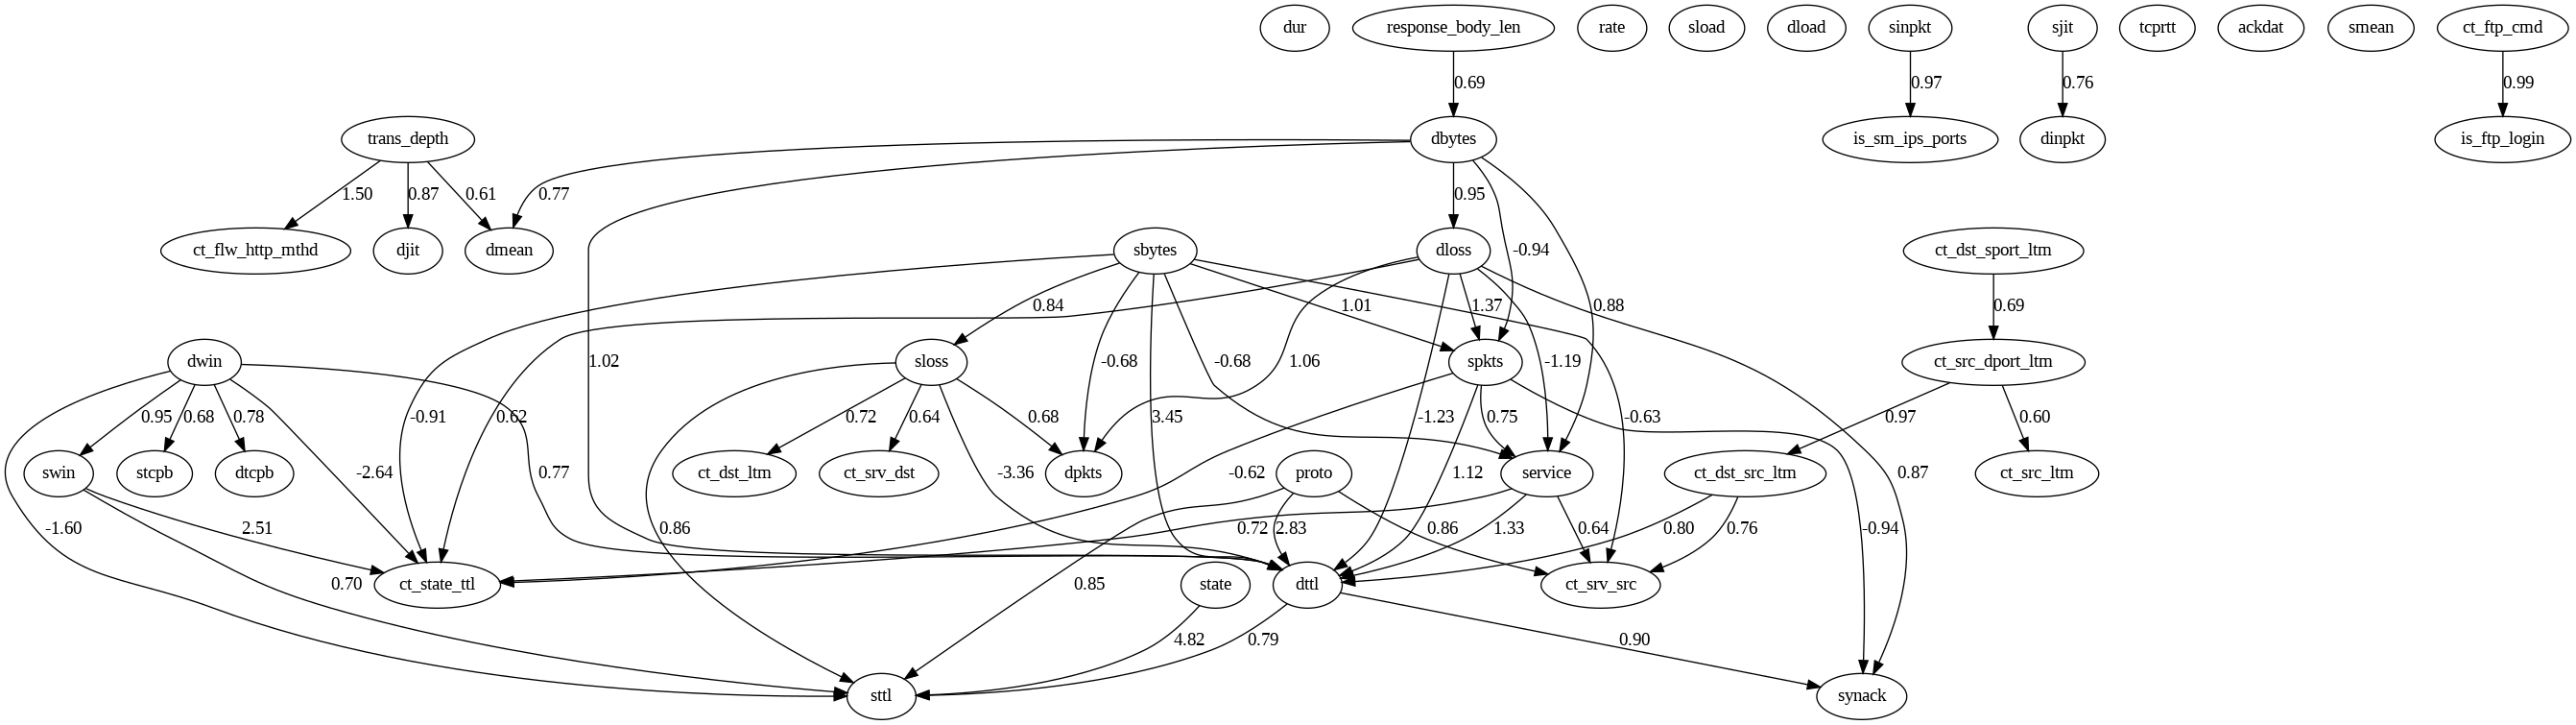

In [ ]:
from IPython.display import Image

# --- NEW: Filter the Adjacency Matrix with a Threshold ---
# This section creates a simplified graph by removing weak causal links.
# You can adjust the threshold value based on your data and desired sparsity.
threshold = 0.6  # Adjust this value as needed

# Create a copy of the original matrix to avoid modifying it
thresholded_matrix = model.adjacency_matrix_.copy()

# Set all values below the threshold to 0
thresholded_matrix[np.abs(thresholded_matrix) < threshold] = 0

print(f"\n--- Thresholded Adjacency Matrix (Threshold: {threshold}) ---\n")
print(thresholded_matrix)

# ==== 4. Visualization ====
# We use the feature names from the DataFrame used for fitting to ensure correct labels.
feature_names = list(df_benign_features.columns)

# Create and save the causal graph using the thresholded matrix.
dot = make_dot(thresholded_matrix, labels=feature_names)
dot.format = 'png'
# Fix: Create a valid filename using the threshold value
output_path = f"/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/benign_culingam_graph_thresholded_{threshold}"
print(f"\nRendering thresholded graph and saving to {output_path}.png...")
dot.render(output_path, cleanup=True)
dot.view()

Image(output_path + '.png')

# culingam on malicious traffic

## drop benign traffic

In [ ]:
df_mal = df[df['label'] == 1]
df_mal = df_mal.drop(columns=['attack_cat'])
df_mal.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
47911,-0.208678,0.000512,0.548451,0.451883,-0.130765,-0.165331,-0.048183,-0.098409,0.123841,0.722026,...,-0.519345,-0.520051,-0.388730,-0.110419,-0.110372,-0.193597,-0.571689,-0.470913,-0.120335,1
47912,-0.208678,0.000512,0.548451,0.451883,-0.130765,-0.165331,-0.048183,-0.098409,0.123841,0.722026,...,-0.396808,-0.348568,-0.118964,-0.110419,-0.110372,-0.193597,-0.571689,-0.195044,-0.120335,1
47913,-0.208678,0.000512,0.548451,0.451883,-0.130765,-0.165331,-0.048183,-0.098409,0.123841,0.722026,...,-0.519345,-0.520051,-0.208886,-0.110419,-0.110372,-0.193597,-0.690790,-0.287000,-0.120335,1
47914,-0.208679,0.000512,0.548451,0.451883,-0.130765,-0.165331,-0.048183,-0.098409,1.509747,0.722026,...,-0.396808,-0.348568,-0.118964,-0.110419,-0.110372,-0.193597,-0.571689,-0.287000,-0.120335,1
47915,-0.208679,0.000512,0.548451,0.451883,-0.130765,-0.165331,-0.048183,-0.098409,0.210460,0.722026,...,-0.519345,-0.520051,-0.388730,-0.110419,-0.110372,-0.193597,0.500218,-0.470913,-0.120335,1


In [ ]:
df_mal.shape

(164673, 43)

In [ ]:
df_mal_features = df_mal.drop(columns=['label'])
df_mal_features.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
47911,-0.208678,0.000512,0.548451,0.451883,-0.130765,-0.165331,-0.048183,-0.098409,0.123841,0.722026,...,-0.617890,-0.519345,-0.520051,-0.388730,-0.110419,-0.110372,-0.193597,-0.571689,-0.470913,-0.120335
47912,-0.208678,0.000512,0.548451,0.451883,-0.130765,-0.165331,-0.048183,-0.098409,0.123841,0.722026,...,-0.495547,-0.396808,-0.348568,-0.118964,-0.110419,-0.110372,-0.193597,-0.571689,-0.195044,-0.120335
47913,-0.208678,0.000512,0.548451,0.451883,-0.130765,-0.165331,-0.048183,-0.098409,0.123841,0.722026,...,-0.617890,-0.519345,-0.520051,-0.208886,-0.110419,-0.110372,-0.193597,-0.690790,-0.287000,-0.120335
47914,-0.208679,0.000512,0.548451,0.451883,-0.130765,-0.165331,-0.048183,-0.098409,1.509747,0.722026,...,-0.495547,-0.396808,-0.348568,-0.118964,-0.110419,-0.110372,-0.193597,-0.571689,-0.287000,-0.120335
47915,-0.208679,0.000512,0.548451,0.451883,-0.130765,-0.165331,-0.048183,-0.098409,0.210460,0.722026,...,-0.617890,-0.519345,-0.520051,-0.388730,-0.110419,-0.110372,-0.193597,0.500218,-0.470913,-0.120335


In [ ]:
df_mal_features.shape

(164673, 42)

## index mapping

In [ ]:
df_list = df_mal_features.columns.to_list()
df_dict = {}

for i, column in zip(range(len(df_list)), df_list):
    df_dict[column] = i

print(len(df_list))
print(df_dict)

42
{'dur': 0, 'proto': 1, 'service': 2, 'state': 3, 'spkts': 4, 'dpkts': 5, 'sbytes': 6, 'dbytes': 7, 'rate': 8, 'sttl': 9, 'dttl': 10, 'sload': 11, 'dload': 12, 'sloss': 13, 'dloss': 14, 'sinpkt': 15, 'dinpkt': 16, 'sjit': 17, 'djit': 18, 'swin': 19, 'stcpb': 20, 'dtcpb': 21, 'dwin': 22, 'tcprtt': 23, 'synack': 24, 'ackdat': 25, 'smean': 26, 'dmean': 27, 'trans_depth': 28, 'response_body_len': 29, 'ct_srv_src': 30, 'ct_state_ttl': 31, 'ct_dst_ltm': 32, 'ct_src_dport_ltm': 33, 'ct_dst_sport_ltm': 34, 'ct_dst_src_ltm': 35, 'is_ftp_login': 36, 'ct_ftp_cmd': 37, 'ct_flw_http_mthd': 38, 'ct_src_ltm': 39, 'ct_srv_dst': 40, 'is_sm_ips_ports': 41}


## culingam

In [ ]:
!pip install lingam
!pip -q install cupy-cuda12x  # pick the right CUDA build for your runtime
!pip -q install git+https://github.com/aknvictor/culingam.git
!pip -q install joblib tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 10.3 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=9f22a216a914f967db56e86b618103a0a5c03dac555d0a660246def465d41fb4
  Stored in directory: /root/.cache/pip/wheels/c6/24/8b/be911b059a61f490f38425eb19bf2fed470a5ead97228e8255
Successfully built semopy
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# New Section

100%|██████████| 42/42 [00:31<00:00,  1.33it/s]
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 11 iterations, i.e. alpha=2.289e-03, with an active set of 7 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 14 iterations, i.e. alpha=6.945e-04, with an active set of 10 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 15 iterations, i.e. alpha=2.418e-04, with an active set of 11 regres

Causal ordering: [np.int32(5), np.int32(18), np.int32(28), np.int32(29), np.int32(13), np.int32(6), np.int32(7), np.int32(12), np.int32(37), np.int32(36), np.int32(27), np.int32(14), np.int32(17), np.int32(15), np.int32(16), np.int32(41), np.int32(3), np.int32(0), np.int32(9), np.int32(20), np.int32(21), np.int32(24), np.int32(19), np.int32(22), np.int32(23), np.int32(4), np.int32(25), np.int32(31), np.int32(10), np.int32(1), np.int32(8), np.int32(11), np.int32(26), np.int32(34), np.int32(33), np.int32(32), np.int32(39), np.int32(40), np.int32(30), np.int32(2), np.int32(35), np.int32(38)]

Adjacency matrix:
 [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.01114186  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         -0.47185126  0.         ...  0.         -0.14404265
   0.        ]
 ...
 [-0.00744933 -0.5430742   0.         ...  0.          0.
   0.        ]
 [-0.011218    0.94959998  0.         ... -0.01250551  0.
   0.        ]
 [ 0. 

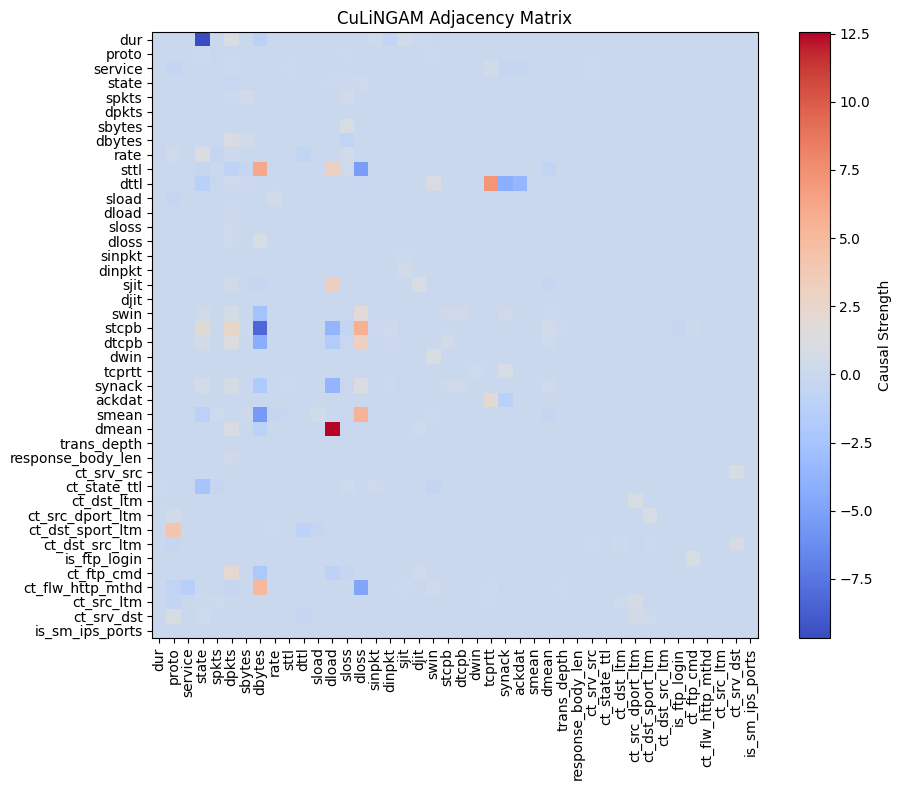

In [ ]:
import lingam
from culingam.directlingam import DirectLiNGAM as CuLiNGAM
from lingam.utils import make_dot
import matplotlib.pyplot as plt

# ==== 1. Initialize CuLiNGAM ====
model = CuLiNGAM(
    random_state=42,
    measure='pwling',          # Pairwise LiNGAM measure
    #prior_knowledge=prior_knowledge  # Optional: matrix with constraints
)

# ==== 2. Fit the model ====
model.fit(df_mal_features)

# ==== 3. Results ====
print("Causal ordering:", model.causal_order_)
print("\nAdjacency matrix:\n", model.adjacency_matrix_)

# ==== 4. Visualization ====
dot = make_dot(model.adjacency_matrix_, labels=list(df_mal_features.columns))
dot.format = 'png'
dot.render("/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/malicious_culingam_graph", cleanup=True)
dot.view()

print("\nGraph saved as 'benign_culingam_graph.png'")

# ==== 5. Plot adjacency heatmap ====
plt.figure(figsize=(10, 8))
plt.imshow(model.adjacency_matrix_, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Causal Strength')
plt.xticks(range(len(df_mal_features.columns)), df_mal_features.columns, rotation=90)
plt.yticks(range(len(df_mal_features.columns)), df_mal_features.columns)
plt.title("CuLiNGAM Adjacency Matrix")
plt.tight_layout()
plt.show()

### saving adjacency matrix

In [ ]:
import numpy as np
import pandas as pd

# Convert to DataFrame with column/row labels
adj_df = pd.DataFrame(
    model.adjacency_matrix_,
    index=df_mal_features.columns,
    columns=df_mal_features.columns
)

# Save to CSV
adj_df.to_csv("/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/malicious_culingam_adjacency_matrix_gpu.csv")

# Save as NumPy binary (faster for loading in Python later)
np.save("malicious_culingam_adjacency_matrix.npy", model.adjacency_matrix_)

print("\nAdjacency matrix saved as:")
print(" - culingam_adjacency_matrix.csv (human-readable)")
print(" - culingam_adjacency_matrix.npy (fast Python load)")


Adjacency matrix saved as:
 - culingam_adjacency_matrix.csv (human-readable)
 - culingam_adjacency_matrix.npy (fast Python load)


### save causal order

In [ ]:
import json
# Save the causal order as a JSON file for easy readability
output_dir = "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/"
causal_order_path = f"{output_dir}malicious_causal_order.json"
feature_names = list(df_mal_features.columns)

try:
    causal_order_names = [feature_names[i] for i in model.causal_order_]
    with open(causal_order_path, 'w') as f:
        json.dump(causal_order_names, f, indent=4)
    print(f"\nSuccessfully saved causal order with feature names to {causal_order_path}")
    print("Causal order:", causal_order_names)
except IOError as e:
    print(f"Error saving causal order file: {e}")


Successfully saved causal order with feature names to /content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/malicious_causal_order.json
Causal order: ['dpkts', 'djit', 'trans_depth', 'response_body_len', 'sloss', 'sbytes', 'dbytes', 'dload', 'ct_ftp_cmd', 'is_ftp_login', 'dmean', 'dloss', 'sjit', 'sinpkt', 'dinpkt', 'is_sm_ips_ports', 'state', 'dur', 'sttl', 'stcpb', 'dtcpb', 'synack', 'swin', 'dwin', 'tcprtt', 'spkts', 'ackdat', 'ct_state_ttl', 'dttl', 'proto', 'rate', 'sload', 'smean', 'ct_dst_sport_ltm', 'ct_src_dport_ltm', 'ct_dst_ltm', 'ct_src_ltm', 'ct_srv_dst', 'ct_srv_src', 'service', 'ct_dst_src_ltm', 'ct_flw_http_mthd']


## graph with threshold


--- Thresholded Adjacency Matrix (Threshold: 0.6) ---

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.94959998 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]

Rendering thresholded graph and saving to /content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/malicious_culingam_graph_thresholded_0.6.png...


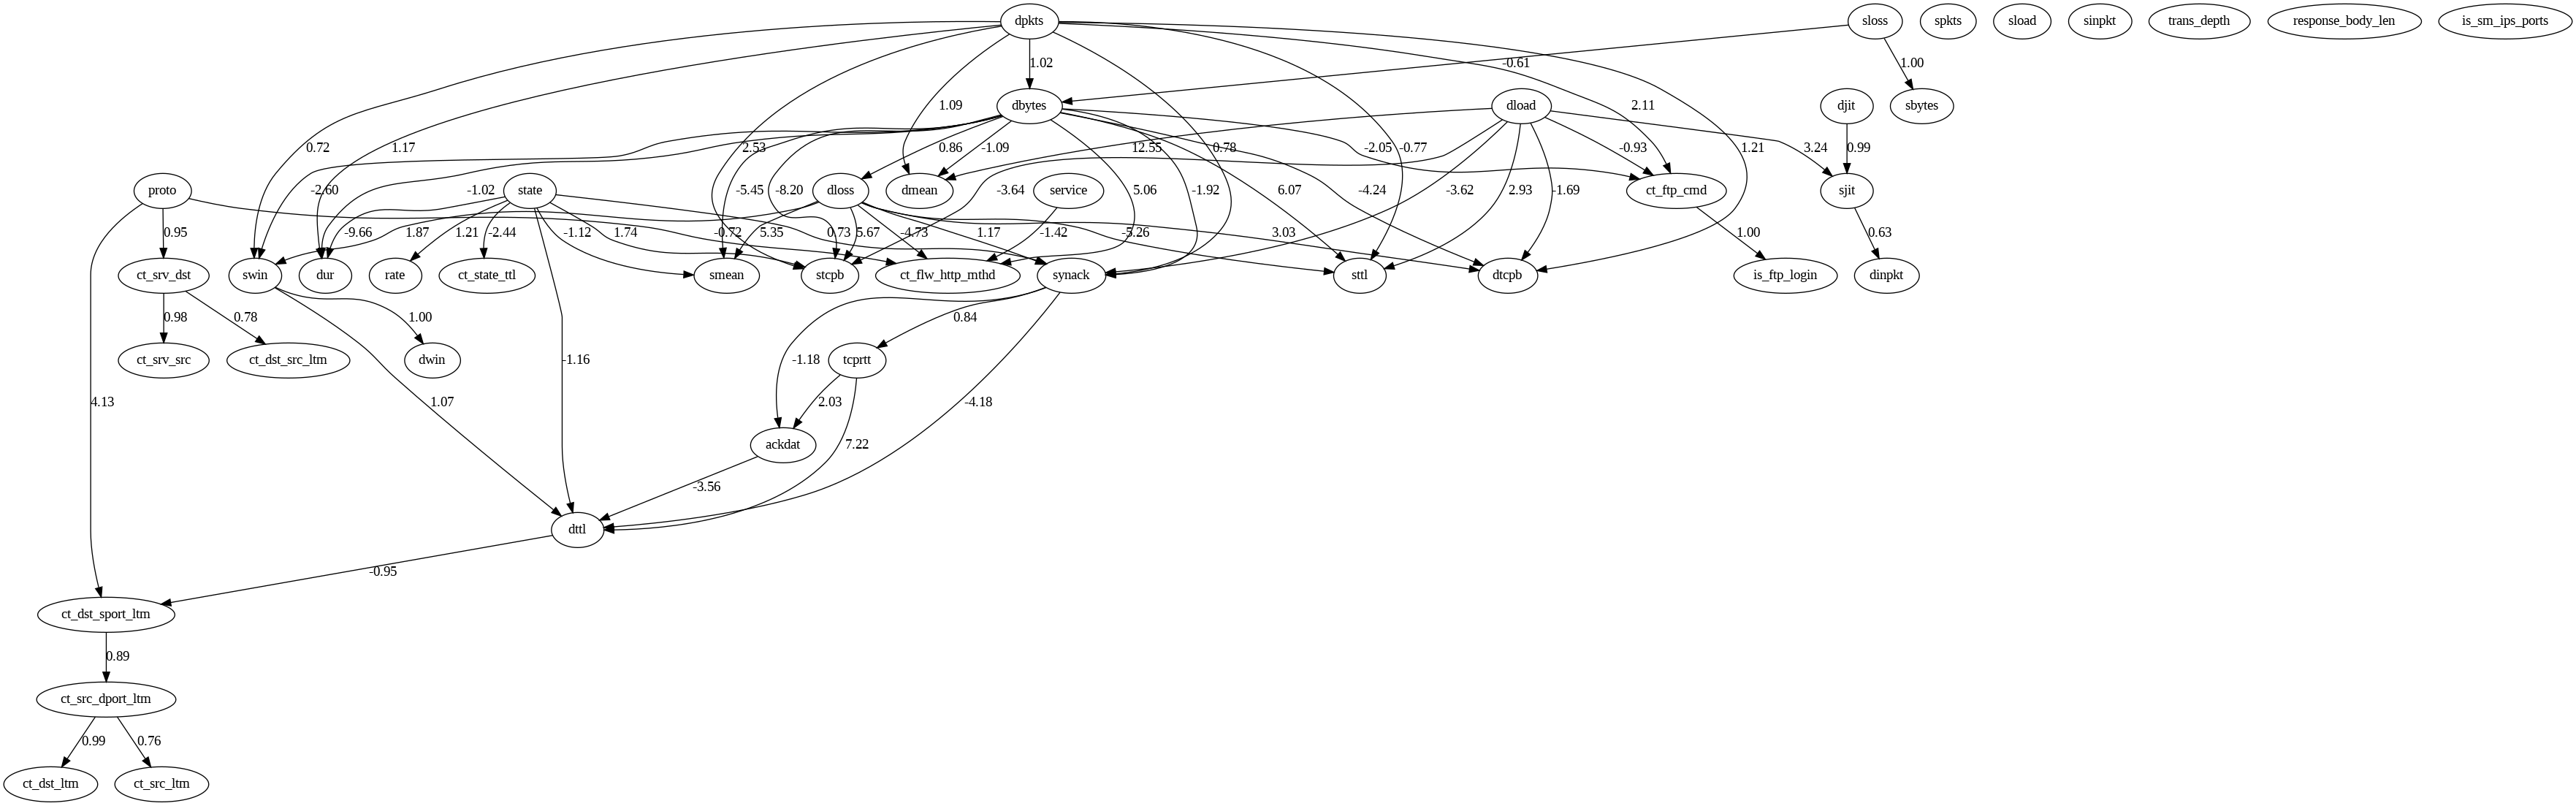

In [ ]:
from IPython.display import Image

# --- NEW: Filter the Adjacency Matrix with a Threshold ---
# This section creates a simplified graph by removing weak causal links.
# You can adjust the threshold value based on your data and desired sparsity.
threshold = 0.6  # Adjust this value as needed

# Create a copy of the original matrix to avoid modifying it
thresholded_matrix = model.adjacency_matrix_.copy()

# Set all values below the threshold to 0
thresholded_matrix[np.abs(thresholded_matrix) < threshold] = 0

print(f"\n--- Thresholded Adjacency Matrix (Threshold: {threshold}) ---\n")
print(thresholded_matrix)

# ==== 4. Visualization ====
# We use the feature names from the DataFrame used for fitting to ensure correct labels.
feature_names = list(df_benign_features.columns)

# Create and save the causal graph using the thresholded matrix.
dot = make_dot(thresholded_matrix, labels=feature_names)
dot.format = 'png'
# Fix: Create a valid filename using the threshold value
output_path = f"/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/malicious_culingam_graph_thresholded_{threshold}"
print(f"\nRendering thresholded graph and saving to {output_path}.png...")
dot.render(output_path, cleanup=True)
dot.view()

Image(output_path + '.png')

## bootstrap

In [ ]:
import numpy as np
import pandas as pd
adj = pd.read_csv("/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/malicious_culingam_adjacency_matrix_gpu.csv", index_col=0).to_numpy()
adj

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.01114186,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.47185126,  0.        , ...,  0.        ,
        -0.14404265,  0.        ],
       ...,
       [-0.00744933, -0.5430742 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.011218  ,  0.94959998,  0.        , ..., -0.01250551,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
!pip install lingam

In [ ]:
import numpy as np
import pandas as pd
from lingam import DirectLiNGAM

# Step 1: Simulate the results from your culingam model
# NOTE: Replace these with the actual results from your culingam model.
# The adjacency matrix (B) and the causal order are the two key outputs.
# The rows and columns of the matrix correspond to the causal order.
# The (i, j) element of B represents the causal effect from variable j to variable i.
feature_cols = df_mal_features.columns
#culingam_adjacency_matrix = model.adjacency_matrix_
culingam_adjacency_matrix = pd.read_csv("/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/malicious_culingam_adjacency_matrix_gpu.csv", index_col=0).to_numpy()

# The causal order is the ordering of variables determined by the model.
# This should be the index positions of the variables in your original features.
# For example, if 'feature_A' is at index 0, 'feature_B' at index 1, etc.
# The causal order tells us the order of variable discovery.
#culingam_causal_order = ['dpkts', 'djit', 'trans_depth', 'response_body_len', 'is_ftp_login', 'ct_ftp_cmd', 'sloss', 'sbytes', 'dloss', 'dload', 'sjit', 'dinpkt', 'dur', 'sinpkt', 'is_sm_ips_ports', 'spkts', 'state', 'label', 'ct_flw_http_mthd', 'dmean', 'stcpb', 'dtcpb', 'dwin', 'swin', 'proto', 'dttl', 'ackdat', 'synack', 'tcprtt', 'ct_state_ttl', 'rate', 'sload', 'smean', 'sttl', 'dbytes', 'attack_cat', 'ct_dst_sport_ltm', 'service', 'ct_src_dport_ltm', 'ct_dst_ltm', 'ct_dst_src_ltm', 'ct_srv_dst', 'ct_srv_src', 'ct_src_ltm']
# The causal order is the ordering of variables determined by the model.
# This should be the index positions of the variables in your original features.
# The list of column names:
import json

# Define the file path
file_path = "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/malicious_causal_order.json"

# Use a 'with' statement to open and load the JSON file
try:
    with open(file_path, 'r') as f:
        culingam_causal_order_names = json.load(f)

    print(culingam_causal_order_names)
    print(f"\nSuccessfully loaded causal order from: {file_path}")

except FileNotFoundError:
    print(f"Error: The file at {file_path} was not found. Please check the path.")
except json.JSONDecodeError:
    print(f"Error: The file at {file_path} is not a valid JSON file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
# Now it's a regular Python list that you can work with
print(culingam_causal_order_names)
print(f"The first feature in the causal order is: {culingam_causal_order_names[0]}")

# The crucial fix: Convert the list of names to a list of integer indices
culingam_causal_order_indices = [feature_cols.get_loc(col_name) for col_name in culingam_causal_order_names]

# ----------------------------------------------------
# Step 2: Create a standard lingam model instance and "load" the results
# Create a new, untrained instance of the DirectLiNGAM model
model_instance = DirectLiNGAM()

# Manually set the private attributes.
# This makes the model 'think' it has already been fitted.
# The public attributes (`.adjacency_matrix_` etc.) will be automatically updated.
model_instance._adjacency_matrix = culingam_adjacency_matrix
model_instance._causal_order = culingam_causal_order_indices

# ----------------------------------------------------
# Step 3: Verify and use the "loaded" model
# You can now access the results as if you had just run the fit() method.
print("Adjacency Matrix from Loaded Model:\n")
print(pd.DataFrame(model_instance.adjacency_matrix_,
                   index=feature_cols,
                   columns=feature_cols))
print("\nCausal Order from Loaded Model:\n")
print([feature_cols[i] for i in model_instance.causal_order_])

# You can now use other methods that rely on the fitted state,
# like estimating total effects.
# For this example, let's assume we need to calculate the total effect of A on E.
# For this method, you also need to provide the original data (X).
X = pd.DataFrame(np.random.rand(100, 42), columns=feature_cols).to_numpy()
total_effect = model_instance.estimate_total_effect(X, from_index=0, to_index=4)
print(f"\nEstimated total effect of 'feature_A' on 'feature_E': {total_effect:.4f}")

['dpkts', 'djit', 'trans_depth', 'response_body_len', 'sloss', 'sbytes', 'dbytes', 'dload', 'ct_ftp_cmd', 'is_ftp_login', 'dmean', 'dloss', 'sjit', 'sinpkt', 'dinpkt', 'is_sm_ips_ports', 'state', 'dur', 'sttl', 'stcpb', 'dtcpb', 'synack', 'swin', 'dwin', 'tcprtt', 'spkts', 'ackdat', 'ct_state_ttl', 'dttl', 'proto', 'rate', 'sload', 'smean', 'ct_dst_sport_ltm', 'ct_src_dport_ltm', 'ct_dst_ltm', 'ct_src_ltm', 'ct_srv_dst', 'ct_srv_src', 'service', 'ct_dst_src_ltm', 'ct_flw_http_mthd']

Successfully loaded causal order from: /content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/malicious_causal_order.json
['dpkts', 'djit', 'trans_depth', 'response_body_len', 'sloss', 'sbytes', 'dbytes', 'dload', 'ct_ftp_cmd', 'is_ftp_login', 'dmean', 'dloss', 'sjit', 'sinpkt', 'dinpkt', 'is_sm_ips_ports', 'state', 'dur', 'sttl', 'stcpb', 'dtcpb', 'synack', 'swin', 'dwin', 'tcprtt', 'spkts', 'ackdat', 'ct_state_ttl', 'dttl', 'proto', 'rate', 'sload', 'smean', 'ct_d

In [ ]:
n_sampling = 1
result=model_instance.bootstrap(df_mal_features,n_sampling=n_sampling)

/usr/local/lib/python3.12/dist-packages/lingam/direct_lingam.py:151: RuntimeWarning: invalid value encountered in scalar divide
  return xi - (np.cov(xi, xj, bias=True)[0, 1] / np.var(xj)) * xj
/usr/local/lib/python3.12/dist-packages/lingam/direct_lingam.py:164: RuntimeWarning: divide by zero encountered in divide
  self._entropy(xi_std) + self._entropy(rj_i / np.std(rj_i))
/usr/local/lib/python3.12/dist-packages/lingam/direct_lingam.py:159: RuntimeWarning: invalid value encountered in multiply
  np.mean(np.log(np.cosh(u))) - gamma) ** 2 - k2 * (np.mean(u * np.exp((-(u ** 2)) / 2))) ** 2
/usr/local/lib/python3.12/dist-packages/lingam/direct_lingam.py:163: RuntimeWarning: divide by zero encountered in divide
  return (self._entropy(xj_std) + self._entropy(ri_j / np.std(ri_j))) - (
/usr/local/lib/python3.12/dist-packages/lingam/direct_lingam.py:224: RuntimeWarning: invalid value encountered in divide
  xj_std = (X[:, j] - np.mean(X[:, j])) / np.std(X[:, j])
/usr/local/lib/python3.12/dist

# testing this

Perfect — you’re at a strong starting point 🚀

Let’s map out the **next logical steps** before we dive into code:

---

### 1. **Define the baseline**

* You already have:

  * **Adjacency matrix (benign)** → this is your “expected” causal structure of normal traffic.
  * **Adjacency matrix (malicious)** → this represents how the graph tends to shift under attack.

Think of the benign matrix as your **reference baseline**.

---

### 2. **Incoming traffic → Sliding window**

* You’ll take new traffic in **batches/windows** (e.g., 1000 rows).
* For each window:

  * Run **LiNGAM** (or your chosen causal discovery) to get the adjacency matrix of that window.
  * This gives you a new “observed” causal graph.

---

### 3. **Compare graphs**

* Now you want to check: *How different is the new graph from the benign baseline?*
  Possible approaches:

  * **Graph distance metric:** e.g., Frobenius norm (`||A_window - A_benign||`), Hamming distance (count edges that change), or cosine similarity.
  * **Edge-level monitoring:** pick the most “important” edges (from benign) and watch their weight drift.
  * **Threshold:** if the distance is bigger than some threshold → flag anomaly.

---

### 4. **Decision making**

* If difference ≤ threshold → classify as **benign**.
* If difference > threshold → classify as **attack**.

This is your **detector logic**.

---

### 5. **Evaluation**

* For testing (offline):

  * You’ll know the **ground truth label** of each window (based on the rows it contains).
  * Compare predictions with ground truth → build confusion matrix.
  * Compute **accuracy, precision, recall, F1**.

---

### 6. **Optional: Refine**

* Try different thresholds, distance measures, or edge selection strategies.
* Maybe combine multiple graph features (structural changes + weight shifts).

---

👉 So the pipeline after having adjacency matrices looks like this:

**Baseline (benign graph) → Sliding window → Causal discovery (LiNGAM) → Adjacency matrix of window → Distance to baseline → Compare to threshold → Classify (benign/attack) → Evaluate with ground truth.**

---

Do you want me to start coding the **graph comparison + anomaly detection step** (distance thresholding), or should I first show you how to structure the **sliding window evaluation loop**?


In [3]:
!pip install distancia==0.0.73
!pip install lingam
!pip -q install cupy-cuda12x  # pick the right CUDA build for your runtime
!pip -q install git+https://github.com/aknvictor/culingam.git
!pip -q install joblib tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 10.7 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=8b1eeedc168bb250645b8130e402e4fd8de09fad19950115cfee9ced94d0afd3
  Stored in directory: /root/.cache/pip/wheels/c6/24/8b/be911b059a61f490f38425eb19bf2fed470a5ead97228e8255
Successfully built semopy
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [4]:
df = df.drop(columns=['attack_cat'])
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,-0.188346,0.477508,0.548451,0.4547,-0.101342,-0.129612,-0.047849,-0.097232,-0.568650,0.702512,...,-0.519345,-0.520051,-0.658496,-0.110419,-0.110372,-0.193597,-0.690790,-0.746782,-0.120335,0
1,-0.099897,0.477508,0.548451,0.4547,-0.042496,0.173998,-0.045110,0.188966,-0.568623,-1.151363,...,-0.519345,-0.520051,-0.568574,-0.110419,-0.110372,-0.193597,-0.690790,-0.287000,-0.120335,0
2,0.063006,0.477508,0.548451,0.4547,-0.086630,-0.022456,-0.047239,-0.008217,-0.569024,-1.151363,...,-0.519345,-0.520051,-0.478652,-0.110419,-0.110372,-0.193597,-0.571689,-0.287000,-0.120335,0
3,0.072800,0.477508,0.019327,0.4547,-0.057207,-0.058174,-0.045720,-0.093142,-0.569027,-1.151363,...,-0.519345,-0.520051,-0.478652,8.503550,8.479151,-0.193597,-0.571689,-0.746782,-0.120335,0
4,-0.133449,0.477508,0.548451,0.4547,-0.071919,-0.111753,-0.046261,-0.096576,-0.568904,0.722026,...,-0.396808,-0.520051,2.848467,-0.110419,-0.110372,-0.193597,-0.571689,2.747558,-0.120335,0


## trial 1: frobenius distance

In [7]:
import numpy as np
import pandas as pd
from culingam.directlingam import DirectLiNGAM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

# ---------- Step 2: Sliding window generator ----------
def sliding_window(df, window_size):
    for i in range(0, len(df), window_size):
        yield df.iloc[i:i+window_size]

# ---------- Step 3: Run LiNGAM on window ----------
def compute_adjacency_matrix(window_df, feature_cols):
    model = DirectLiNGAM()
    X = window_df[feature_cols].values
    model.fit(X)
    return model.adjacency_matrix_

# ---------- Step 4: Graph distance ----------
def graph_distance(A1, A2):
    # Frobenius norm difference
    return np.linalg.norm(A1 - A2)

# ---------- Step 5+6: Evaluation with baseline comparison ----------
def evaluate_sliding_windows(df, feature_cols, label_col, benign_adj, malicious_adj, window_size=1000):
    predictions = []
    ground_truths = []

    num_windows = len(df) // window_size

    for i, window_df in enumerate(sliding_window(df, window_size)):
        window_labels = window_df[label_col].values

        # Ground truth: if any malicious in the window, label as 1
        malicious_count = np.sum(window_labels)
        window_truth = 1 if malicious_count > 0 else 0
        ground_truths.append(window_truth)

        # --- Compute adjacency for this window ---
        try:
            window_adj = compute_adjacency_matrix(window_df, feature_cols)
        except Exception as e:
            print(f"⚠️ LiNGAM failed on window {i+1}, using zeros. Error: {e}")
            window_adj = np.zeros_like(benign_adj)

        # --- Compute similarities (inverse distance) ---
        sim_benign = 1 / (1 + graph_distance(window_adj, benign_adj))
        sim_malicious = 1 / (1 + graph_distance(window_adj, malicious_adj))

        # Prediction: whichever similarity is higher
        prediction = 0 if sim_benign >= sim_malicious else 1
        predictions.append(prediction)

        # --- Print logs ---
        print(f"\n📊 Window {i+1} ({i*window_size}–{(i+1)*window_size}):")
        print(f"   Malicious rows in window: {malicious_count}/{window_size}")
        print(f"   → Ground truth label: {window_truth} ({'Attack' if window_truth==1 else 'Benign'})")
        print(f"   Similarity with benign baseline: {sim_benign:.4f}")
        print(f"   Similarity with malicious baseline: {sim_malicious:.4f}")
        print(f"   → Predicted label: {prediction} ({'Attack' if prediction==1 else 'Benign'})")

    # --- Final evaluation metrics ---
    print("\n=== 📝 Evaluation Metrics ===")
    print("Accuracy :", accuracy_score(ground_truths, predictions))
    print("Precision:", precision_score(ground_truths, predictions))
    print("Recall   :", recall_score(ground_truths, predictions))
    print("F1 Score :", f1_score(ground_truths, predictions))

    return predictions, ground_truths


# ---------- Example Usage ----------
# Load baselines
A_benign = pd.read_csv(
    "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/benign_culingam_adjacency_matrix_gpu.csv",
    index_col=0
).to_numpy()

A_malicious = pd.read_csv(
    "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/malicious_culingam_adjacency_matrix_gpu.csv",
    index_col=0
).to_numpy()

# Example: df should already be loaded with features + 'label'
feature_cols = [c for c in df.columns if c != 'label']

# Run evaluation
results = evaluate_sliding_windows(df, feature_cols, 'label', A_benign, A_malicious, window_size=1000)
print(results)

100%|██████████| 42/42 [00:09<00:00,  4.35it/s]



📊 Window 1 (0–1000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0349
   Similarity with malicious baseline: 0.0255
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:10<00:00,  3.99it/s]



📊 Window 2 (1000–2000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0025
   Similarity with malicious baseline: 0.0025
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.37it/s]



📊 Window 3 (2000–3000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0026
   Similarity with malicious baseline: 0.0026
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.97it/s]



📊 Window 4 (3000–4000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0060
   Similarity with malicious baseline: 0.0059
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.56it/s]



📊 Window 5 (4000–5000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0324
   Similarity with malicious baseline: 0.0249
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.52it/s]



📊 Window 6 (5000–6000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0379
   Similarity with malicious baseline: 0.0271
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.29it/s]



📊 Window 7 (6000–7000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0422
   Similarity with malicious baseline: 0.0283
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.88it/s]



📊 Window 8 (7000–8000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0221
   Similarity with malicious baseline: 0.0192
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.96it/s]



📊 Window 9 (8000–9000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0198
   Similarity with malicious baseline: 0.0176
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.55it/s]



📊 Window 10 (9000–10000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0090
   Similarity with malicious baseline: 0.0088
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.48it/s]



📊 Window 11 (10000–11000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0022
   Similarity with malicious baseline: 0.0022
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.35it/s]



📊 Window 12 (11000–12000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0159
   Similarity with malicious baseline: 0.0147
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  5.01it/s]



📊 Window 13 (12000–13000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0299
   Similarity with malicious baseline: 0.0237
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.41it/s]



📊 Window 14 (13000–14000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0366
   Similarity with malicious baseline: 0.0266
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.53it/s]



📊 Window 15 (14000–15000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0107
   Similarity with malicious baseline: 0.0104
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.42it/s]



📊 Window 16 (15000–16000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0108
   Similarity with malicious baseline: 0.0103
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.61it/s]



📊 Window 17 (16000–17000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0163
   Similarity with malicious baseline: 0.0152
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.97it/s]



📊 Window 18 (17000–18000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0278
   Similarity with malicious baseline: 0.0224
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.51it/s]



📊 Window 19 (18000–19000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0341
   Similarity with malicious baseline: 0.0250
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.52it/s]



📊 Window 20 (19000–20000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0114
   Similarity with malicious baseline: 0.0116
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.37it/s]



📊 Window 21 (20000–21000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0000
   Similarity with malicious baseline: 0.0000
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.54it/s]



📊 Window 22 (21000–22000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0086
   Similarity with malicious baseline: 0.0084
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.96it/s]



📊 Window 23 (22000–23000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0282
   Similarity with malicious baseline: 0.0226
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.63it/s]



📊 Window 24 (23000–24000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0292
   Similarity with malicious baseline: 0.0230
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.49it/s]



📊 Window 25 (24000–25000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0117
   Similarity with malicious baseline: 0.0112
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.48it/s]



📊 Window 26 (25000–26000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0135
   Similarity with malicious baseline: 0.0127
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.25it/s]



📊 Window 27 (26000–27000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0010
   Similarity with malicious baseline: 0.0010
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.95it/s]



📊 Window 28 (27000–28000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0079
   Similarity with malicious baseline: 0.0077
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.90it/s]



📊 Window 29 (28000–29000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0074
   Similarity with malicious baseline: 0.0072
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.55it/s]



📊 Window 30 (29000–30000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0000
   Similarity with malicious baseline: 0.0000
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.49it/s]



📊 Window 31 (30000–31000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0382
   Similarity with malicious baseline: 0.0270
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.48it/s]



📊 Window 32 (31000–32000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0029
   Similarity with malicious baseline: 0.0029
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.96it/s]



📊 Window 33 (32000–33000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0001
   Similarity with malicious baseline: 0.0001
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.65it/s]



📊 Window 34 (33000–34000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0076
   Similarity with malicious baseline: 0.0074
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.49it/s]



📊 Window 35 (34000–35000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0216
   Similarity with malicious baseline: 0.0196
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.46it/s]



📊 Window 36 (35000–36000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0000
   Similarity with malicious baseline: 0.0000
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.27it/s]



📊 Window 37 (36000–37000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0277
   Similarity with malicious baseline: 0.0226
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.99it/s]



📊 Window 38 (37000–38000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0000
   Similarity with malicious baseline: 0.0000
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.67it/s]



📊 Window 39 (38000–39000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0036
   Similarity with malicious baseline: 0.0036
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.53it/s]



📊 Window 40 (39000–40000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0283
   Similarity with malicious baseline: 0.0232
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.44it/s]



📊 Window 41 (40000–41000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0361
   Similarity with malicious baseline: 0.0265
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.52it/s]



📊 Window 42 (41000–42000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0008
   Similarity with malicious baseline: 0.0008
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.96it/s]



📊 Window 43 (42000–43000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0010
   Similarity with malicious baseline: 0.0010
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.58it/s]



📊 Window 44 (43000–44000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0252
   Similarity with malicious baseline: 0.0214
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.52it/s]



📊 Window 45 (44000–45000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0019
   Similarity with malicious baseline: 0.0019
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.41it/s]



📊 Window 46 (45000–46000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0029
   Similarity with malicious baseline: 0.0029
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.91it/s]



📊 Window 47 (46000–47000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0052
   Similarity with malicious baseline: 0.0052
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  5.00it/s]



📊 Window 48 (47000–48000):
   Malicious rows in window: 89/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0354
   Similarity with malicious baseline: 0.0260
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.57it/s]



📊 Window 49 (48000–49000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0354
   Similarity with malicious baseline: 0.0281
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.54it/s]



📊 Window 50 (49000–50000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0491
   Similarity with malicious baseline: 0.0417
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.38it/s]



📊 Window 51 (50000–51000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0000
   Similarity with malicious baseline: 0.0000
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.98it/s]



📊 Window 52 (51000–52000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0032
   Similarity with malicious baseline: 0.0032
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.95it/s]



📊 Window 53 (52000–53000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0486
   Similarity with malicious baseline: 0.0391
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.52it/s]



📊 Window 54 (53000–54000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0343
   Similarity with malicious baseline: 0.0313
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.50it/s]



📊 Window 55 (54000–55000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0469
   Similarity with malicious baseline: 0.0413
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.33it/s]



📊 Window 56 (55000–56000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0000
   Similarity with malicious baseline: 0.0000
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  5.01it/s]



📊 Window 57 (56000–57000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0203
   Similarity with malicious baseline: 0.0167
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.97it/s]



📊 Window 58 (57000–58000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0198
   Similarity with malicious baseline: 0.0192
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.50it/s]



📊 Window 59 (58000–59000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0330
   Similarity with malicious baseline: 0.0303
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.50it/s]



📊 Window 60 (59000–60000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0177
   Similarity with malicious baseline: 0.0170
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.27it/s]



📊 Window 61 (60000–61000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0342
   Similarity with malicious baseline: 0.0307
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.97it/s]



📊 Window 62 (61000–62000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0514
   Similarity with malicious baseline: 0.0344
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.82it/s]



📊 Window 63 (62000–63000):
   Malicious rows in window: 864/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0314
   Similarity with malicious baseline: 0.0255
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.54it/s]



📊 Window 64 (63000–64000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0447
   Similarity with malicious baseline: 0.0357
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.51it/s]



📊 Window 65 (64000–65000):
   Malicious rows in window: 926/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0218
   Similarity with malicious baseline: 0.0205
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.34it/s]



📊 Window 66 (65000–66000):
   Malicious rows in window: 837/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0398
   Similarity with malicious baseline: 0.0305
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  5.01it/s]



📊 Window 67 (66000–67000):
   Malicious rows in window: 858/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0218
   Similarity with malicious baseline: 0.0198
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.66it/s]



📊 Window 68 (67000–68000):
   Malicious rows in window: 876/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0513
   Similarity with malicious baseline: 0.0399
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.43it/s]



📊 Window 69 (68000–69000):
   Malicious rows in window: 948/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0424
   Similarity with malicious baseline: 0.0379
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.43it/s]



📊 Window 70 (69000–70000):
   Malicious rows in window: 921/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0248
   Similarity with malicious baseline: 0.0226
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.48it/s]



📊 Window 71 (70000–71000):
   Malicious rows in window: 948/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0350
   Similarity with malicious baseline: 0.0334
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.98it/s]



📊 Window 72 (71000–72000):
   Malicious rows in window: 807/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0198
   Similarity with malicious baseline: 0.0198
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.66it/s]



📊 Window 73 (72000–73000):
   Malicious rows in window: 844/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0337
   Similarity with malicious baseline: 0.0381
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.52it/s]



📊 Window 74 (73000–74000):
   Malicious rows in window: 877/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0412
   Similarity with malicious baseline: 0.0343
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.55it/s]



📊 Window 75 (74000–75000):
   Malicious rows in window: 780/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0201
   Similarity with malicious baseline: 0.0174
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.25it/s]



📊 Window 76 (75000–76000):
   Malicious rows in window: 768/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0369
   Similarity with malicious baseline: 0.0369
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.97it/s]



📊 Window 77 (76000–77000):
   Malicious rows in window: 875/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0400
   Similarity with malicious baseline: 0.0318
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.72it/s]



📊 Window 78 (77000–78000):
   Malicious rows in window: 907/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0166
   Similarity with malicious baseline: 0.0156
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.50it/s]



📊 Window 79 (78000–79000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0373
   Similarity with malicious baseline: 0.0334
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.38it/s]



📊 Window 80 (79000–80000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0449
   Similarity with malicious baseline: 0.0390
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.35it/s]



📊 Window 81 (80000–81000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0000
   Similarity with malicious baseline: 0.0000
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  5.00it/s]



📊 Window 82 (81000–82000):
   Malicious rows in window: 878/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0464
   Similarity with malicious baseline: 0.0413
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.60it/s]



📊 Window 83 (82000–83000):
   Malicious rows in window: 742/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0439
   Similarity with malicious baseline: 0.0375
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.51it/s]



📊 Window 84 (83000–84000):
   Malicious rows in window: 879/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0305
   Similarity with malicious baseline: 0.0285
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.41it/s]



📊 Window 85 (84000–85000):
   Malicious rows in window: 669/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0418
   Similarity with malicious baseline: 0.0361
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.62it/s]



📊 Window 86 (85000–86000):
   Malicious rows in window: 831/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0378
   Similarity with malicious baseline: 0.0373
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.92it/s]



📊 Window 87 (86000–87000):
   Malicious rows in window: 793/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0311
   Similarity with malicious baseline: 0.0257
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.58it/s]



📊 Window 88 (87000–88000):
   Malicious rows in window: 850/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0213
   Similarity with malicious baseline: 0.0213
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.43it/s]



📊 Window 89 (88000–89000):
   Malicious rows in window: 711/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0478
   Similarity with malicious baseline: 0.0371
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.33it/s]



📊 Window 90 (89000–90000):
   Malicious rows in window: 813/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0179
   Similarity with malicious baseline: 0.0190
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.87it/s]



📊 Window 91 (90000–91000):
   Malicious rows in window: 873/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0313
   Similarity with malicious baseline: 0.0322
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.97it/s]



📊 Window 92 (91000–92000):
   Malicious rows in window: 961/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0363
   Similarity with malicious baseline: 0.0310
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.65it/s]



📊 Window 93 (92000–93000):
   Malicious rows in window: 852/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0386
   Similarity with malicious baseline: 0.0305
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.55it/s]



📊 Window 94 (93000–94000):
   Malicious rows in window: 927/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0000
   Similarity with malicious baseline: 0.0000
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.56it/s]



📊 Window 95 (94000–95000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0406
   Similarity with malicious baseline: 0.0362
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.29it/s]



📊 Window 96 (95000–96000):
   Malicious rows in window: 950/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0336
   Similarity with malicious baseline: 0.0330
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.97it/s]



📊 Window 97 (96000–97000):
   Malicious rows in window: 970/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0000
   Similarity with malicious baseline: 0.0000
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.53it/s]



📊 Window 98 (97000–98000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0472
   Similarity with malicious baseline: 0.0349
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.54it/s]



📊 Window 99 (98000–99000):
   Malicious rows in window: 937/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0375
   Similarity with malicious baseline: 0.0347
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.28it/s]



📊 Window 100 (99000–100000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0211
   Similarity with malicious baseline: 0.0247
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  5.03it/s]



📊 Window 101 (100000–101000):
   Malicious rows in window: 735/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0328
   Similarity with malicious baseline: 0.0287
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.75it/s]



📊 Window 102 (101000–102000):
   Malicious rows in window: 744/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0630
   Similarity with malicious baseline: 0.0358
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.53it/s]



📊 Window 103 (102000–103000):
   Malicious rows in window: 749/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0265
   Similarity with malicious baseline: 0.0250
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.57it/s]



📊 Window 104 (103000–104000):
   Malicious rows in window: 950/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0378
   Similarity with malicious baseline: 0.0316
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.36it/s]



📊 Window 105 (104000–105000):
   Malicious rows in window: 775/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0299
   Similarity with malicious baseline: 0.0317
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.96it/s]



📊 Window 106 (105000–106000):
   Malicious rows in window: 800/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0459
   Similarity with malicious baseline: 0.0378
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.54it/s]



📊 Window 107 (106000–107000):
   Malicious rows in window: 800/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0409
   Similarity with malicious baseline: 0.0380
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.57it/s]



📊 Window 108 (107000–108000):
   Malicious rows in window: 745/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0317
   Similarity with malicious baseline: 0.0321
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.48it/s]



📊 Window 109 (108000–109000):
   Malicious rows in window: 698/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0285
   Similarity with malicious baseline: 0.0260
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.92it/s]



📊 Window 110 (109000–110000):
   Malicious rows in window: 734/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0210
   Similarity with malicious baseline: 0.0200
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.94it/s]



📊 Window 111 (110000–111000):
   Malicious rows in window: 721/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0367
   Similarity with malicious baseline: 0.0347
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.55it/s]



📊 Window 112 (111000–112000):
   Malicious rows in window: 672/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0223
   Similarity with malicious baseline: 0.0202
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.49it/s]



📊 Window 113 (112000–113000):
   Malicious rows in window: 774/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0306
   Similarity with malicious baseline: 0.0302
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.43it/s]



📊 Window 114 (113000–114000):
   Malicious rows in window: 850/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0296
   Similarity with malicious baseline: 0.0347
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.98it/s]



📊 Window 115 (114000–115000):
   Malicious rows in window: 810/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0335
   Similarity with malicious baseline: 0.0305
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.74it/s]



📊 Window 116 (115000–116000):
   Malicious rows in window: 682/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0000
   Similarity with malicious baseline: 0.0000
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.50it/s]



📊 Window 117 (116000–117000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0469
   Similarity with malicious baseline: 0.0371
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.49it/s]



📊 Window 118 (117000–118000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0178
   Similarity with malicious baseline: 0.0195
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.29it/s]



📊 Window 119 (118000–119000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0187
   Similarity with malicious baseline: 0.0214
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.72it/s]



📊 Window 120 (119000–120000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0239
   Similarity with malicious baseline: 0.0264
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.98it/s]



📊 Window 121 (120000–121000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0233
   Similarity with malicious baseline: 0.0269
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.48it/s]



📊 Window 122 (121000–122000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0065
   Similarity with malicious baseline: 0.0065
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.57it/s]



📊 Window 123 (122000–123000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0267
   Similarity with malicious baseline: 0.0275
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.28it/s]



📊 Window 124 (123000–124000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0000
   Similarity with malicious baseline: 0.0000
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.93it/s]



📊 Window 125 (124000–125000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0241
   Similarity with malicious baseline: 0.0320
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.72it/s]



📊 Window 126 (125000–126000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0178
   Similarity with malicious baseline: 0.0205
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.51it/s]



📊 Window 127 (126000–127000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0221
   Similarity with malicious baseline: 0.0254
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.43it/s]



📊 Window 128 (127000–128000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0253
   Similarity with malicious baseline: 0.0245
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.27it/s]



📊 Window 129 (128000–129000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0000
   Similarity with malicious baseline: 0.0000
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.94it/s]



📊 Window 130 (129000–130000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0252
   Similarity with malicious baseline: 0.0256
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.71it/s]



📊 Window 131 (130000–131000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0182
   Similarity with malicious baseline: 0.0195
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.50it/s]



📊 Window 132 (131000–132000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0274
   Similarity with malicious baseline: 0.0352
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.48it/s]



📊 Window 133 (132000–133000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0245
   Similarity with malicious baseline: 0.0188
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.61it/s]



📊 Window 134 (133000–134000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0000
   Similarity with malicious baseline: 0.0000
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.97it/s]



📊 Window 135 (134000–135000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0000
   Similarity with malicious baseline: 0.0000
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.52it/s]



📊 Window 136 (135000–136000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0033
   Similarity with malicious baseline: 0.0033
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.55it/s]



📊 Window 137 (136000–137000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0015
   Similarity with malicious baseline: 0.0015
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.42it/s]



📊 Window 138 (137000–138000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0169
   Similarity with malicious baseline: 0.0173
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.40it/s]



📊 Window 139 (138000–139000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0175
   Similarity with malicious baseline: 0.0189
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.99it/s]



📊 Window 140 (139000–140000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0172
   Similarity with malicious baseline: 0.0168
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.69it/s]



📊 Window 141 (140000–141000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0241
   Similarity with malicious baseline: 0.0233
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.54it/s]



📊 Window 142 (141000–142000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0327
   Similarity with malicious baseline: 0.0305
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.44it/s]



📊 Window 143 (142000–143000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0016
   Similarity with malicious baseline: 0.0016
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.31it/s]



📊 Window 144 (143000–144000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0122
   Similarity with malicious baseline: 0.0124
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.99it/s]



📊 Window 145 (144000–145000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0353
   Similarity with malicious baseline: 0.0336
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.55it/s]



📊 Window 146 (145000–146000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0249
   Similarity with malicious baseline: 0.0219
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.46it/s]



📊 Window 147 (146000–147000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0083
   Similarity with malicious baseline: 0.0082
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.42it/s]



📊 Window 148 (147000–148000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0058
   Similarity with malicious baseline: 0.0059
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.87it/s]



📊 Window 149 (148000–149000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0227
   Similarity with malicious baseline: 0.0208
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.93it/s]



📊 Window 150 (149000–150000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0267
   Similarity with malicious baseline: 0.0269
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.48it/s]



📊 Window 151 (150000–151000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0190
   Similarity with malicious baseline: 0.0197
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.51it/s]



📊 Window 152 (151000–152000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0236
   Similarity with malicious baseline: 0.0238
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.33it/s]



📊 Window 153 (152000–153000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0283
   Similarity with malicious baseline: 0.0294
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.86it/s]



📊 Window 154 (153000–154000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0339
   Similarity with malicious baseline: 0.0263
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.92it/s]



📊 Window 155 (154000–155000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0208
   Similarity with malicious baseline: 0.0303
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.55it/s]



📊 Window 156 (155000–156000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0094
   Similarity with malicious baseline: 0.0092
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.45it/s]



📊 Window 157 (156000–157000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0164
   Similarity with malicious baseline: 0.0167
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.30it/s]



📊 Window 158 (157000–158000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0009
   Similarity with malicious baseline: 0.0009
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.99it/s]



📊 Window 159 (158000–159000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0194
   Similarity with malicious baseline: 0.0184
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.70it/s]



📊 Window 160 (159000–160000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0185
   Similarity with malicious baseline: 0.0190
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.53it/s]



📊 Window 161 (160000–161000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0167
   Similarity with malicious baseline: 0.0170
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.49it/s]



📊 Window 162 (161000–162000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0005
   Similarity with malicious baseline: 0.0005
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.56it/s]



📊 Window 163 (162000–163000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0001
   Similarity with malicious baseline: 0.0001
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.98it/s]



📊 Window 164 (163000–164000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0045
   Similarity with malicious baseline: 0.0045
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.51it/s]



📊 Window 165 (164000–165000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0167
   Similarity with malicious baseline: 0.0162
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.45it/s]



📊 Window 166 (165000–166000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0000
   Similarity with malicious baseline: 0.0000
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.36it/s]



📊 Window 167 (166000–167000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0237
   Similarity with malicious baseline: 0.0279
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.85it/s]



📊 Window 168 (167000–168000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0061
   Similarity with malicious baseline: 0.0061
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.91it/s]



📊 Window 169 (168000–169000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0321
   Similarity with malicious baseline: 0.0283
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.48it/s]



📊 Window 170 (169000–170000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0257
   Similarity with malicious baseline: 0.0237
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.49it/s]



📊 Window 171 (170000–171000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0215
   Similarity with malicious baseline: 0.0260
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.35it/s]



📊 Window 172 (171000–172000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0186
   Similarity with malicious baseline: 0.0199
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.94it/s]



📊 Window 173 (172000–173000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0156
   Similarity with malicious baseline: 0.0162
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.91it/s]



📊 Window 174 (173000–174000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0076
   Similarity with malicious baseline: 0.0077
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.57it/s]



📊 Window 175 (174000–175000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0069
   Similarity with malicious baseline: 0.0069
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.50it/s]



📊 Window 176 (175000–176000):
   Malicious rows in window: 757/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0269
   Similarity with malicious baseline: 0.0244
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.40it/s]



📊 Window 177 (176000–177000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0405
   Similarity with malicious baseline: 0.0334
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.97it/s]



📊 Window 178 (177000–178000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0239
   Similarity with malicious baseline: 0.0221
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.72it/s]



📊 Window 179 (178000–179000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0238
   Similarity with malicious baseline: 0.0242
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.48it/s]



📊 Window 180 (179000–180000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0183
   Similarity with malicious baseline: 0.0169
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.55it/s]



📊 Window 181 (180000–181000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0170
   Similarity with malicious baseline: 0.0164
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.30it/s]



📊 Window 182 (181000–182000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0451
   Similarity with malicious baseline: 0.0331
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  5.00it/s]



📊 Window 183 (182000–183000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0000
   Similarity with malicious baseline: 0.0000
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.91it/s]



📊 Window 184 (183000–184000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0278
   Similarity with malicious baseline: 0.0269
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.57it/s]



📊 Window 185 (184000–185000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0181
   Similarity with malicious baseline: 0.0172
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.56it/s]



📊 Window 186 (185000–186000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0529
   Similarity with malicious baseline: 0.0354
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.31it/s]



📊 Window 187 (186000–187000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0281
   Similarity with malicious baseline: 0.0267
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.98it/s]



📊 Window 188 (187000–188000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0245
   Similarity with malicious baseline: 0.0217
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.68it/s]



📊 Window 189 (188000–189000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0016
   Similarity with malicious baseline: 0.0016
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.49it/s]



📊 Window 190 (189000–190000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0020
   Similarity with malicious baseline: 0.0020
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.40it/s]



📊 Window 191 (190000–191000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0000
   Similarity with malicious baseline: 0.0000
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.70it/s]



📊 Window 192 (191000–192000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0000
   Similarity with malicious baseline: 0.0000
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.96it/s]



📊 Window 193 (192000–193000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0000
   Similarity with malicious baseline: 0.0000
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.54it/s]



📊 Window 194 (193000–194000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0001
   Similarity with malicious baseline: 0.0001
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.53it/s]



📊 Window 195 (194000–195000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0001
   Similarity with malicious baseline: 0.0001
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.43it/s]



📊 Window 196 (195000–196000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0024
   Similarity with malicious baseline: 0.0024
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.93it/s]



📊 Window 197 (196000–197000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0000
   Similarity with malicious baseline: 0.0000
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.48it/s]



📊 Window 198 (197000–198000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0001
   Similarity with malicious baseline: 0.0001
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.47it/s]



📊 Window 199 (198000–199000):
   Malicious rows in window: 701/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0139
   Similarity with malicious baseline: 0.0131
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.40it/s]



📊 Window 200 (199000–200000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0357
   Similarity with malicious baseline: 0.0260
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.24it/s]



📊 Window 201 (200000–201000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0187
   Similarity with malicious baseline: 0.0168
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.99it/s]



📊 Window 202 (201000–202000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0154
   Similarity with malicious baseline: 0.0143
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.78it/s]



📊 Window 203 (202000–203000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0029
   Similarity with malicious baseline: 0.0029
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.47it/s]



📊 Window 204 (203000–204000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0067
   Similarity with malicious baseline: 0.0066
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.54it/s]



📊 Window 205 (204000–205000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0003
   Similarity with malicious baseline: 0.0003
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.27it/s]



📊 Window 206 (205000–206000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0028
   Similarity with malicious baseline: 0.0027
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.95it/s]



📊 Window 207 (206000–207000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0210
   Similarity with malicious baseline: 0.0184
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.99it/s]



📊 Window 208 (207000–208000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0029
   Similarity with malicious baseline: 0.0029
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.52it/s]



📊 Window 209 (208000–209000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0081
   Similarity with malicious baseline: 0.0080
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.54it/s]



📊 Window 210 (209000–210000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0000
   Similarity with malicious baseline: 0.0000
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.29it/s]



📊 Window 211 (210000–211000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0000
   Similarity with malicious baseline: 0.0000
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  5.04it/s]



📊 Window 212 (211000–212000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0057
   Similarity with malicious baseline: 0.0056
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.91it/s]



📊 Window 213 (212000–213000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0018
   Similarity with malicious baseline: 0.0018
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.49it/s]



📊 Window 214 (213000–214000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0055
   Similarity with malicious baseline: 0.0054
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.40it/s]



📊 Window 215 (214000–215000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0069
   Similarity with malicious baseline: 0.0068
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.33it/s]



📊 Window 216 (215000–216000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0219
   Similarity with malicious baseline: 0.0189
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.86it/s]



📊 Window 217 (216000–217000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0013
   Similarity with malicious baseline: 0.0013
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.93it/s]



📊 Window 218 (217000–218000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0018
   Similarity with malicious baseline: 0.0018
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.55it/s]



📊 Window 219 (218000–219000):
   Malicious rows in window: 22/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0161
   Similarity with malicious baseline: 0.0145
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.51it/s]



📊 Window 220 (219000–220000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0138
   Similarity with malicious baseline: 0.0133
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.36it/s]



📊 Window 221 (220000–221000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0431
   Similarity with malicious baseline: 0.0316
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.32it/s]



📊 Window 222 (221000–222000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0356
   Similarity with malicious baseline: 0.0290
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.99it/s]



📊 Window 223 (222000–223000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0497
   Similarity with malicious baseline: 0.0370
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:10<00:00,  4.05it/s]



📊 Window 224 (223000–224000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0364
   Similarity with malicious baseline: 0.0365
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:11<00:00,  3.81it/s]



📊 Window 225 (224000–225000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0481
   Similarity with malicious baseline: 0.0365
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.22it/s]



📊 Window 226 (225000–226000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0525
   Similarity with malicious baseline: 0.0399
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.32it/s]



📊 Window 227 (226000–227000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0513
   Similarity with malicious baseline: 0.0351
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:10<00:00,  4.18it/s]



📊 Window 228 (227000–228000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0469
   Similarity with malicious baseline: 0.0308
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:10<00:00,  3.90it/s]



📊 Window 229 (228000–229000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0106
   Similarity with malicious baseline: 0.0104
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:11<00:00,  3.81it/s]



📊 Window 230 (229000–230000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0355
   Similarity with malicious baseline: 0.0286
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.44it/s]



📊 Window 231 (230000–231000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0239
   Similarity with malicious baseline: 0.0260
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.59it/s]



📊 Window 232 (231000–232000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0210
   Similarity with malicious baseline: 0.0232
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.96it/s]



📊 Window 233 (232000–233000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0198
   Similarity with malicious baseline: 0.0178
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.57it/s]



📊 Window 234 (233000–234000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0053
   Similarity with malicious baseline: 0.0053
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.46it/s]



📊 Window 235 (234000–235000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0359
   Similarity with malicious baseline: 0.0331
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:10<00:00,  3.99it/s]



📊 Window 236 (235000–236000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0092
   Similarity with malicious baseline: 0.0089
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:10<00:00,  4.10it/s]



📊 Window 237 (236000–237000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0274
   Similarity with malicious baseline: 0.0266
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:12<00:00,  3.48it/s]



📊 Window 238 (237000–238000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0385
   Similarity with malicious baseline: 0.0329
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:10<00:00,  4.03it/s]



📊 Window 239 (238000–239000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0130
   Similarity with malicious baseline: 0.0132
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.38it/s]



📊 Window 240 (239000–240000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0069
   Similarity with malicious baseline: 0.0069
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:11<00:00,  3.57it/s]



📊 Window 241 (240000–241000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0438
   Similarity with malicious baseline: 0.0356
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.93it/s]



📊 Window 242 (241000–242000):
   Malicious rows in window: 193/1000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.0023
   Similarity with malicious baseline: 0.0023
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:10<00:00,  4.18it/s]



📊 Window 243 (242000–243000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0012
   Similarity with malicious baseline: 0.0012
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:10<00:00,  4.12it/s]



📊 Window 244 (243000–244000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0132
   Similarity with malicious baseline: 0.0124
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:10<00:00,  4.09it/s]



📊 Window 245 (244000–245000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0083
   Similarity with malicious baseline: 0.0081
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:10<00:00,  4.05it/s]



📊 Window 246 (245000–246000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0254
   Similarity with malicious baseline: 0.0203
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:11<00:00,  3.51it/s]



📊 Window 247 (246000–247000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0154
   Similarity with malicious baseline: 0.0149
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:10<00:00,  4.13it/s]



📊 Window 248 (247000–248000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0039
   Similarity with malicious baseline: 0.0039
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.96it/s]



📊 Window 249 (248000–249000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0653
   Similarity with malicious baseline: 0.0318
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.30it/s]



📊 Window 250 (249000–250000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0018
   Similarity with malicious baseline: 0.0018
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.51it/s]



📊 Window 251 (250000–251000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0078
   Similarity with malicious baseline: 0.0075
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.40it/s]



📊 Window 252 (251000–252000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0121
   Similarity with malicious baseline: 0.0115
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.83it/s]



📊 Window 253 (252000–253000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0179
   Similarity with malicious baseline: 0.0159
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:11<00:00,  3.56it/s]



📊 Window 254 (253000–254000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0135
   Similarity with malicious baseline: 0.0126
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.36it/s]



📊 Window 255 (254000–255000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0243
   Similarity with malicious baseline: 0.0224
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:14<00:00,  2.89it/s]



📊 Window 256 (255000–256000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0039
   Similarity with malicious baseline: 0.0039
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:11<00:00,  3.76it/s]



📊 Window 257 (256000–257000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0067
   Similarity with malicious baseline: 0.0065
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:10<00:00,  3.91it/s]



📊 Window 258 (257000–258000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 0.0076
   Similarity with malicious baseline: 0.0074
   → Predicted label: 0 (Benign)

=== 📝 Evaluation Metrics ===
Accuracy : 0.5038759689922481
Precision: 0.9137931034482759
Recall   : 0.30113636363636365
F1 Score : 0.452991452991453
([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## trial 2: spectral distance
https://distancia.readthedocs.io/en/latest/SpectralDistance.html


In [8]:
import numpy as np
import pandas as pd
from culingam.directlingam import DirectLiNGAM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import networkx as nx
from distancia import SpectralDistance
import warnings
warnings.filterwarnings("ignore")

# ---------- Step 2: Sliding window generator ----------
def sliding_window(df, window_size):
    for i in range(0, len(df), window_size):
        yield df.iloc[i:i+window_size]

# ---------- Step 3: Run LiNGAM on window ----------
def compute_adjacency_matrix(window_df, feature_cols):
    model = DirectLiNGAM()
    X = window_df[feature_cols].values
    model.fit(X)
    return model.adjacency_matrix_

# ---------- Step 4: Graph conversion ----------
def adjacency_to_graph(A):
    G = nx.from_numpy_array(A, create_using=nx.DiGraph)
    return G

# ---------- Step 5: Graph distance ----------
def graph_distance(A1, A2, method="spectral"):
    if method == "frobenius":
        return np.linalg.norm(A1 - A2)
    elif method == "spectral":
        G1, G2 = adjacency_to_graph(A1), adjacency_to_graph(A2)
        sd = SpectralDistance(k=20, normalized=True)
        return sd.calculate(G1, G2)
    else:
        raise ValueError("Unknown distance method")

# ---------- Step 6: Decision logic ----------
def classify_window(window_adj, A_benign, A_malign, threshold, method="spectral"):
    dist = graph_distance(window_adj, A_benign, method)
    dist2 = graph_distance(window_adj, A_malign, method)

    return 0 if dist < dist2 else 1, dist, dist2   # 0=benign, 1=attack

# ---------- Step 7: Evaluation ----------
def evaluate_sliding_windows(df, feature_cols, label_col, A_benign, A_malign, window_size=2000, threshold=5.0, method="spectral"):
    y_true, y_pred = [], []

    for i, window_df in enumerate(sliding_window(df, window_size)):
        if len(window_df) < window_size:
            continue  # skip incomplete window

        # Ground truth for window (majority label)
        #label = window[label_col].mode()[0]  # most frequent label
        #y_true.append(0 if label == 'benign' else 1)

        window_labels = window_df[label_col].values
        malicious_count = np.sum(window_labels)
        window_truth = 1 if malicious_count > 0 else 0
        y_true.append(window_truth)


        # LiNGAM adjacency for this window
        A_window = compute_adjacency_matrix(window_df, feature_cols)

        # Classify based on distance to benign
        prediction, sim_benign, sim_malicious = classify_window(A_window, A_benign, A_malign, threshold, method)
        y_pred.append(prediction)

        # --- Print logs ---
        print(f"\n📊 Window {i+1} ({i*window_size}–{(i+1)*window_size}):")
        print(f"   Malicious rows in window: {malicious_count}/{window_size}")
        print(f"   → Ground truth label: {window_truth} ({'Attack' if window_truth==1 else 'Benign'})")
        print(f"   Similarity with benign baseline: {sim_benign:.4f}")
        print(f"   Similarity with malicious baseline: {sim_malicious:.4f}")
        print(f"   → Predicted label: {prediction} ({'Attack' if prediction==1 else 'Benign'})")

    # Metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "confusion_matrix": cm}


# ---------- Example Usage ----------
# Load baselines
A_benign = pd.read_csv(
    "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/benign_culingam_adjacency_matrix_gpu.csv",
    index_col=0
).to_numpy()

A_malicious = pd.read_csv(
    "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/malicious_culingam_adjacency_matrix_gpu.csv",
    index_col=0
).to_numpy()

# Example: df should already be loaded with features + 'label'
feature_cols = [c for c in df.columns if c != 'label']

# Run evaluation
results = evaluate_sliding_windows(df, feature_cols, 'label', A_benign, A_malicious, window_size=20000, method='spectral')
print(results)

100%|██████████| 42/42 [00:10<00:00,  3.94it/s]



📊 Window 1 (0–20000):
   Malicious rows in window: 0/20000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 1.3305
   Similarity with malicious baseline: 1.3259
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:12<00:00,  3.32it/s]



📊 Window 2 (20000–40000):
   Malicious rows in window: 0/20000
   → Ground truth label: 0 (Benign)
   Similarity with benign baseline: 2.0970
   Similarity with malicious baseline: 2.0689
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:11<00:00,  3.81it/s]



📊 Window 3 (40000–60000):
   Malicious rows in window: 12089/20000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.9451
   Similarity with malicious baseline: 0.9371
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:10<00:00,  3.83it/s]



📊 Window 4 (60000–80000):
   Malicious rows in window: 18036/20000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 1.6167
   Similarity with malicious baseline: 1.6099
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:11<00:00,  3.69it/s]



📊 Window 5 (80000–100000):
   Malicious rows in window: 17636/20000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 1.6024
   Similarity with malicious baseline: 1.5954
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.22it/s]



📊 Window 6 (100000–120000):
   Malicious rows in window: 16239/20000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 1.3250
   Similarity with malicious baseline: 1.3205
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:11<00:00,  3.78it/s]



📊 Window 7 (120000–140000):
   Malicious rows in window: 20000/20000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.9144
   Similarity with malicious baseline: 0.9090
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:10<00:00,  3.93it/s]



📊 Window 8 (140000–160000):
   Malicious rows in window: 20000/20000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 1.3371
   Similarity with malicious baseline: 1.3319
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:11<00:00,  3.72it/s]



📊 Window 9 (160000–180000):
   Malicious rows in window: 19757/20000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 1.6027
   Similarity with malicious baseline: 1.5953
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:11<00:00,  3.74it/s]



📊 Window 10 (180000–200000):
   Malicious rows in window: 18701/20000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 1.6192
   Similarity with malicious baseline: 1.6110
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:11<00:00,  3.68it/s]



📊 Window 11 (200000–220000):
   Malicious rows in window: 1022/20000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 0.9184
   Similarity with malicious baseline: 0.9145
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:10<00:00,  3.97it/s]



📊 Window 12 (220000–240000):
   Malicious rows in window: 20000/20000
   → Ground truth label: 1 (Attack)
   Similarity with benign baseline: 1.2977
   Similarity with malicious baseline: 1.2918
   → Predicted label: 1 (Attack)
{'accuracy': 0.8333333333333334, 'precision': 0.8333333333333334, 'recall': 1.0, 'f1': 0.9090909090909091, 'confusion_matrix': array([[ 0,  2],
       [ 0, 10]])}


## trial 3: Spectral Norm Distance
https://distancia.readthedocs.io/en/latest/SpectralNormDistance.html

In [5]:
from distancia.metrics import SpectralNormDistance

import numpy as np
import pandas as pd
from culingam.directlingam import DirectLiNGAM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import networkx as nx
import warnings
warnings.filterwarnings("ignore")

# ---------- Step 2: Sliding window generator ----------
def sliding_window(df, window_size):
    for i in range(0, len(df), window_size):
        yield df.iloc[i:i+window_size]

# ---------- Step 3: Run LiNGAM on window ----------
def compute_adjacency_matrix(window_df, feature_cols):
    model = DirectLiNGAM()
    X = window_df[feature_cols].values
    model.fit(X)
    return model.adjacency_matrix_

# ---------- Step 4: Graph conversion ----------
def adjacency_to_graph(A):
    G = nx.from_numpy_array(A, create_using=nx.DiGraph)
    return G

# # ---------- Step 5: Graph distance ----------
# def graph_distance(A1, A2):
#     if method == "frobenius":
#         return np.linalg.norm(A1 - A2)
#     elif method == "spectral":
#         G1, G2 = adjacency_to_graph(A1), adjacency_to_graph(A2)
#         sd = SpectralDistance(k=20, normalized=True)
#         return sd.calculate(G1, G2)
#     else:
#         raise ValueError("Unknown distance method")

# ---------- Step 6: Decision logic ----------
def classify_window(window_adj, A_benign, A_malign, threshold, method="spectral"):
    # Initialize the measure
    spec_dist = SpectralNormDistance()

    # Calculate distance between two Markov chains
    dist = spec_dist.compute(A_benign, window_adj)

    # Initialize the measure
    spec_dist = SpectralNormDistance()

    # Calculate distance between two Markov chains
    dist2 = spec_dist.compute(A_malign, window_adj)

    return 0 if dist < dist2 else 1   # 0=benign, 1=attack

# ---------- Step 7: Evaluation ----------
def evaluate_sliding_windows(df, feature_cols, label_col, A_benign, A_malign, window_size=2000, threshold=5.0, method="spectral"):
    y_true, y_pred = [], []

    for i, window_df in enumerate(sliding_window(df, window_size)):
        if len(window_df) < window_size:
            continue  # skip incomplete window

        # Ground truth for window (majority label)
        #label = window[label_col].mode()[0]  # most frequent label
        #y_true.append(0 if label == 'benign' else 1)

        window_labels = window_df[label_col].values
        malicious_count = np.sum(window_labels)
        window_truth = 1 if malicious_count > 0 else 0
        y_true.append(window_truth)


        # LiNGAM adjacency for this window
        A_window = compute_adjacency_matrix(window_df, feature_cols)

        # Classify based on distance to benign
        #prediction, sim_benign, sim_malicious = classify_window(A_window, A_benign, A_malign, threshold, method)
        classify_window(A_window, A_benign, A_malign, threshold, method)
        break
        y_pred.append(prediction)

        # --- Print logs ---
        print(f"\n📊 Window {i+1} ({i*window_size}–{(i+1)*window_size}):")
        print(f"   Malicious rows in window: {malicious_count}/{window_size}")
        print(f"   → Ground truth label: {window_truth} ({'Attack' if window_truth==1 else 'Benign'})")
        print(f"   Similarity with benign baseline: {sim_benign:.4f}")
        print(f"   Similarity with malicious baseline: {sim_malicious:.4f}")
        print(f"   → Predicted label: {prediction} ({'Attack' if prediction==1 else 'Benign'})")

    # Metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "confusion_matrix": cm}


# ---------- Example Usage ----------
# Load baselines
A_benign = pd.read_csv(
    "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/benign_culingam_adjacency_matrix_gpu.csv",
    index_col=0
).to_numpy()

A_malicious = pd.read_csv(
    "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/malicious_culingam_adjacency_matrix_gpu.csv",
    index_col=0
).to_numpy()

# Example: df should already be loaded with features + 'label'
feature_cols = [c for c in df.columns if c != 'label']

# Run evaluation
results = evaluate_sliding_windows(df, feature_cols, 'label', A_benign, A_malicious, window_size=20000, method='spectral')
print(results)

gensim n'est pas installé, l'utilisation de FastText est désactivée.


ModuleNotFoundError: No module named 'distancia.metrics'

## trial 4: matirx spectral


In [8]:
from distancia import MatrixSpectral

import numpy as np
import pandas as pd
from culingam.directlingam import DirectLiNGAM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import networkx as nx
import warnings
warnings.filterwarnings("ignore")

# ---------- Step 2: Sliding window generator ----------
def sliding_window(df, window_size):
    for i in range(0, len(df), window_size):
        yield df.iloc[i:i+window_size]

# ---------- Step 3: Run LiNGAM on window ----------
def compute_adjacency_matrix(window_df, feature_cols):
    model = DirectLiNGAM()
    X = window_df[feature_cols].values
    model.fit(X)
    return model.adjacency_matrix_

# ---------- Step 4: Graph conversion ----------
def adjacency_to_graph(A):
    G = nx.from_numpy_array(A, create_using=nx.DiGraph)
    return G

# # ---------- Step 5: Graph distance ----------
# def graph_distance(A1, A2):
#     if method == "frobenius":
#         return np.linalg.norm(A1 - A2)
#     elif method == "spectral":
#         G1, G2 = adjacency_to_graph(A1), adjacency_to_graph(A2)
#         sd = SpectralDistance(k=20, normalized=True)
#         return sd.calculate(G1, G2)
#     else:
#         raise ValueError("Unknown distance method")

# ---------- Step 6: Decision logic ----------
def classify_window(window_adj, A_benign, A_malign, threshold, method="spectral"):
    # Initialize the measure
    # Initialize calculator
    calculator = MatrixSpectral()

    # Compute spectral distance
    dist = calculator.compute(A_benign, window_adj)


    # Calculate distance between two Markov chains
    dist2 = calculator.compute(A_malign, window_adj)

    return 0 if dist < dist2 else 1   # 0=benign, 1=attack

# ---------- Step 7: Evaluation ----------
def evaluate_sliding_windows(df, feature_cols, label_col, A_benign, A_malign, window_size=2000, threshold=5.0, method="spectral"):
    y_true, y_pred = [], []

    for i, window_df in enumerate(sliding_window(df, window_size)):
        if len(window_df) < window_size:
            continue  # skip incomplete window

        # Ground truth for window (majority label)
        #label = window[label_col].mode()[0]  # most frequent label
        #y_true.append(0 if label == 'benign' else 1)

        window_labels = window_df[label_col].values
        malicious_count = np.sum(window_labels)
        window_truth = 1 if malicious_count > 0 else 0
        y_true.append(window_truth)


        # LiNGAM adjacency for this window
        A_window = compute_adjacency_matrix(window_df, feature_cols)

        # Classify based on distance to benign
        #prediction, sim_benign, sim_malicious = classify_window(A_window, A_benign, A_malign, threshold, method)
        prediction = classify_window(A_window, A_benign, A_malign, threshold, method)

        y_pred.append(prediction)

        # --- Print logs ---
        print(f"\n📊 Window {i+1} ({i*window_size}–{(i+1)*window_size}):")
        print(f"   Malicious rows in window: {malicious_count}/{window_size}")
        print(f"   → Ground truth label: {window_truth} ({'Attack' if window_truth==1 else 'Benign'})")
        #print(f"   Similarity with benign baseline: {sim_benign:.4f}")
        #print(f"   Similarity with malicious baseline: {sim_malicious:.4f}")
        print(f"   → Predicted label: {prediction} ({'Attack' if prediction==1 else 'Benign'})")

    # Metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "confusion_matrix": cm}


# ---------- Example Usage ----------
# Load baselines
A_benign = pd.read_csv(
    "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/benign_culingam_adjacency_matrix_gpu.csv",
    index_col=0
).to_numpy()

A_malicious = pd.read_csv(
    "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/malicious_culingam_adjacency_matrix_gpu.csv",
    index_col=0
).to_numpy()

# Example: df should already be loaded with features + 'label'
feature_cols = [c for c in df.columns if c != 'label']

# Run evaluation
results = evaluate_sliding_windows(df, feature_cols, 'label', A_benign, A_malicious, window_size=10000, method='spectral')
print(results)

100%|██████████| 42/42 [00:10<00:00,  4.18it/s]



📊 Window 1 (0–10000):
   Malicious rows in window: 0/10000
   → Ground truth label: 0 (Benign)
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.76it/s]



📊 Window 2 (10000–20000):
   Malicious rows in window: 0/10000
   → Ground truth label: 0 (Benign)
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.23it/s]



📊 Window 3 (20000–30000):
   Malicious rows in window: 0/10000
   → Ground truth label: 0 (Benign)
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.35it/s]



📊 Window 4 (30000–40000):
   Malicious rows in window: 0/10000
   → Ground truth label: 0 (Benign)
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.77it/s]



📊 Window 5 (40000–50000):
   Malicious rows in window: 2089/10000
   → Ground truth label: 1 (Attack)
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:10<00:00,  4.16it/s]



📊 Window 6 (50000–60000):
   Malicious rows in window: 10000/10000
   → Ground truth label: 1 (Attack)
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.32it/s]



📊 Window 7 (60000–70000):
   Malicious rows in window: 9230/10000
   → Ground truth label: 1 (Attack)
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:10<00:00,  3.91it/s]



📊 Window 8 (70000–80000):
   Malicious rows in window: 8806/10000
   → Ground truth label: 1 (Attack)
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.45it/s]



📊 Window 9 (80000–90000):
   Malicious rows in window: 8166/10000
   → Ground truth label: 1 (Attack)
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.32it/s]



📊 Window 10 (90000–100000):
   Malicious rows in window: 9470/10000
   → Ground truth label: 1 (Attack)
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:17<00:00,  2.38it/s]



📊 Window 11 (100000–110000):
   Malicious rows in window: 7730/10000
   → Ground truth label: 1 (Attack)
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:10<00:00,  4.04it/s]



📊 Window 12 (110000–120000):
   Malicious rows in window: 8509/10000
   → Ground truth label: 1 (Attack)
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:13<00:00,  3.04it/s]



📊 Window 13 (120000–130000):
   Malicious rows in window: 10000/10000
   → Ground truth label: 1 (Attack)
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:12<00:00,  3.43it/s]



📊 Window 14 (130000–140000):
   Malicious rows in window: 10000/10000
   → Ground truth label: 1 (Attack)
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.34it/s]



📊 Window 15 (140000–150000):
   Malicious rows in window: 10000/10000
   → Ground truth label: 1 (Attack)
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:13<00:00,  3.09it/s]



📊 Window 16 (150000–160000):
   Malicious rows in window: 10000/10000
   → Ground truth label: 1 (Attack)
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:11<00:00,  3.62it/s]



📊 Window 17 (160000–170000):
   Malicious rows in window: 10000/10000
   → Ground truth label: 1 (Attack)
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.85it/s]



📊 Window 18 (170000–180000):
   Malicious rows in window: 9757/10000
   → Ground truth label: 1 (Attack)
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.30it/s]



📊 Window 19 (180000–190000):
   Malicious rows in window: 10000/10000
   → Ground truth label: 1 (Attack)
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:10<00:00,  4.18it/s]



📊 Window 20 (190000–200000):
   Malicious rows in window: 8701/10000
   → Ground truth label: 1 (Attack)
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.39it/s]



📊 Window 21 (200000–210000):
   Malicious rows in window: 0/10000
   → Ground truth label: 0 (Benign)
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:11<00:00,  3.79it/s]



📊 Window 22 (210000–220000):
   Malicious rows in window: 1022/10000
   → Ground truth label: 1 (Attack)
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.23it/s]



📊 Window 23 (220000–230000):
   Malicious rows in window: 10000/10000
   → Ground truth label: 1 (Attack)
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.77it/s]



📊 Window 24 (230000–240000):
   Malicious rows in window: 10000/10000
   → Ground truth label: 1 (Attack)
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:10<00:00,  4.15it/s]



📊 Window 25 (240000–250000):
   Malicious rows in window: 1193/10000
   → Ground truth label: 1 (Attack)
   → Predicted label: 1 (Attack)
{'accuracy': 0.8, 'precision': 0.8, 'recall': 1.0, 'f1': 0.8888888888888888, 'confusion_matrix': array([[ 0,  5],
       [ 0, 20]])}


## trial 5: Structural Hamming Distance and Graph Edit Distance

In [9]:
import numpy as np
import pandas as pd
from culingam.directlingam import DirectLiNGAM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

# ==============================================================================
# Graph Distance Metrics
# ==============================================================================

def structural_hamming_distance(A1, A2):
    """
    Calculates the Structural Hamming Distance (SHD) between two adjacency matrices.

    SHD is the sum of:
    1. The number of edges in A1 that are not in A2.
    2. The number of edges in A2 that are not in A1.
    3. The number of edges that exist in both, but are directed differently.

    Parameters:
    A1 (np.ndarray): The first adjacency matrix.
    A2 (np.ndarray): The second adjacency matrix.

    Returns:
    int: The calculated Structural Hamming Distance.
    """
    # Ensure matrices are binary for easy comparison
    A1_binary = (A1 > 0).astype(int)
    A2_binary = (A2 > 0).astype(int)

    # Calculate different types of errors
    diff = np.abs(A1_binary - A2_binary)
    additions = np.sum((A2_binary == 1) & (A1_binary == 0))
    deletions = np.sum((A1_binary == 1) & (A2_binary == 0))
    reversals = np.sum((A1_binary.T == 1) & (A2_binary == 1))

    # Total SHD is the sum of additions, deletions, and reversals
    shd = additions + deletions + reversals

    return shd

def graph_edit_distance_simple(A1, A2):
    """
    Calculates a simplified Graph Edit Distance (GED) proxy.

    GED is the minimum number of edit operations (add/delete node or edge) to
    transform one graph into another. A full GED is NP-hard to compute.

    This function uses a simple approximation by calculating the sum of the absolute
    differences between the two adjacency matrices (L1 norm).

    Parameters:
    A1 (np.ndarray): The first adjacency matrix.
    A2 (np.ndarray): The second adjacency matrix.

    Returns:
    float: The calculated simple Graph Edit Distance proxy.
    """
    # The L1 norm (Manhattan distance) is a simple, common proxy for GED
    return np.sum(np.abs(A1 - A2))

def graph_distance_frobenius(A1, A2):
    """
    Calculates the Frobenius norm of the difference between two adjacency matrices.
    This is the metric you were using previously.

    Parameters:
    A1 (np.ndarray): The first adjacency matrix.
    A2 (np.ndarray): The second adjacency matrix.

    Returns:
    float: The Frobenius norm of the difference.
    """
    return np.linalg.norm(A1 - A2)

# ==============================================================================
# Main Evaluation Logic
# ==============================================================================

# ---------- Step 2: Sliding window generator ----------
def sliding_window(df, window_size):
    for i in range(0, len(df), window_size):
        yield df.iloc[i:i+window_size]

# ---------- Step 3: Run LiNGAM on window ----------
def compute_adjacency_matrix(window_df, feature_cols):
    model = DirectLiNGAM()
    X = window_df[feature_cols].values
    model.fit(X)
    return model.adjacency_matrix_

# ---------- Step 5+6: Evaluation with baseline comparison ----------
def evaluate_sliding_windows(df, feature_cols, label_col, benign_adj, malicious_adj, window_size=1000):
    predictions = []
    ground_truths = []

    num_windows = len(df) // window_size

    for i, window_df in enumerate(sliding_window(df, window_size)):
        window_labels = window_df[label_col].values

        # Ground truth: if any malicious in the window, label as 1
        malicious_count = np.sum(window_labels)
        window_truth = 1 if malicious_count > 0 else 0
        ground_truths.append(window_truth)

        # --- Compute adjacency for this window ---
        try:
            window_adj = compute_adjacency_matrix(window_df, feature_cols)
        except Exception as e:
            print(f"⚠️ LiNGAM failed on window {i+1}, using zeros. Error: {e}")
            window_adj = np.zeros_like(benign_adj)

        # --- Compute distances to baselines using different metrics ---
        # Frobenius distance (original metric)
        dist_benign_frob = graph_distance_frobenius(window_adj, benign_adj)
        dist_malicious_frob = graph_distance_frobenius(window_adj, malicious_adj)

        # Structural Hamming Distance (new metric)
        dist_benign_shd = structural_hamming_distance(window_adj, benign_adj)
        dist_malicious_shd = structural_hamming_distance(window_adj, malicious_adj)

        # Simplified Graph Edit Distance (new metric)
        dist_benign_ged = graph_edit_distance_simple(window_adj, benign_adj)
        dist_malicious_ged = graph_edit_distance_simple(window_adj, malicious_adj)

        # We can still make a prediction based on one of the metrics.
        # Let's stick with the Frobenius norm for the prediction logic.
        prediction = 0 if dist_benign_frob <= dist_malicious_frob else 1
        predictions.append(prediction)

        # --- Print logs ---
        print(f"\n📊 Window {i+1} ({i*window_size}–{(i+1)*window_size}):")
        print(f"   Malicious rows in window: {malicious_count}/{window_size}")
        print(f"   → Ground truth label: {window_truth} ({'Attack' if window_truth==1 else 'Benign'})")
        print(f"   Distances to benign baseline:")
        print(f"      - Frobenius: {dist_benign_frob:.4f}")
        print(f"      - SHD: {dist_benign_shd}")
        print(f"      - GED (Simple): {dist_benign_ged:.4f}")
        print(f"   Distances to malicious baseline:")
        print(f"      - Frobenius: {dist_malicious_frob:.4f}")
        print(f"      - SHD: {dist_malicious_shd}")
        print(f"      - GED (Simple): {dist_malicious_ged:.4f}")
        print(f"   → Predicted label: {prediction} ({'Attack' if prediction==1 else 'Benign'})")

    # --- Final evaluation metrics ---
    print("\n=== 📝 Evaluation Metrics ===")
    print("Accuracy :", accuracy_score(ground_truths, predictions))
    print("Precision:", precision_score(ground_truths, predictions))
    print("Recall   :", recall_score(ground_truths, predictions))
    print("F1 Score :", f1_score(ground_truths, predictions))

    return predictions, ground_truths

# Example Usage
# Load baselines (these files need to be available in your environment)
try:
    A_benign = pd.read_csv(
        "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/benign_culingam_adjacency_matrix_gpu.csv",
        index_col=0
    ).to_numpy()

    A_malicious = pd.read_csv(
        "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/malicious_culingam_adjacency_matrix_gpu.csv",
        index_col=0
    ).to_numpy()

    # Feature columns for the dummy data
    feature_cols = [c for c in df.columns if c != 'label']

    # Run evaluation
    results = evaluate_sliding_windows(df, feature_cols, 'label', A_benign, A_malicious, window_size=10000)
    print(results)

except FileNotFoundError:
    print("Error: Baseline CSV files not found. Please make sure 'benign_culingam_adjacency_matrix_gpu.csv' and 'malicious_culingam_adjacency_matrix_gpu.csv' are in the correct directory.")


100%|██████████| 42/42 [00:10<00:00,  4.18it/s]



📊 Window 1 (0–10000):
   Malicious rows in window: 0/10000
   → Ground truth label: 0 (Benign)
   Distances to benign baseline:
      - Frobenius: 23.9974
      - SHD: 363
      - GED (Simple): 190.6139
   Distances to malicious baseline:
      - Frobenius: 35.2214
      - SHD: 328
      - GED (Simple): 301.4338
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.27it/s]



📊 Window 2 (10000–20000):
   Malicious rows in window: 0/10000
   → Ground truth label: 0 (Benign)
   Distances to benign baseline:
      - Frobenius: 30.7552
      - SHD: 353
      - GED (Simple): 231.1134
   Distances to malicious baseline:
      - Frobenius: 40.3389
      - SHD: 326
      - GED (Simple): 344.4458
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.38it/s]



📊 Window 3 (20000–30000):
   Malicious rows in window: 0/10000
   → Ground truth label: 0 (Benign)
   Distances to benign baseline:
      - Frobenius: 22.2030
      - SHD: 377
      - GED (Simple): 169.8366
   Distances to malicious baseline:
      - Frobenius: 34.1363
      - SHD: 330
      - GED (Simple): 276.2591
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.33it/s]



📊 Window 4 (30000–40000):
   Malicious rows in window: 0/10000
   → Ground truth label: 0 (Benign)
   Distances to benign baseline:
      - Frobenius: 38.1633
      - SHD: 407
      - GED (Simple): 241.1580
   Distances to malicious baseline:
      - Frobenius: 46.0208
      - SHD: 347
      - GED (Simple): 341.7070
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.32it/s]



📊 Window 5 (40000–50000):
   Malicious rows in window: 2089/10000
   → Ground truth label: 1 (Attack)
   Distances to benign baseline:
      - Frobenius: 12.6473
      - SHD: 342
      - GED (Simple): 142.9999
   Distances to malicious baseline:
      - Frobenius: 29.5876
      - SHD: 343
      - GED (Simple): 261.0085
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:10<00:00,  4.14it/s]



📊 Window 6 (50000–60000):
   Malicious rows in window: 10000/10000
   → Ground truth label: 1 (Attack)
   Distances to benign baseline:
      - Frobenius: 23.5357
      - SHD: 397
      - GED (Simple): 206.1082
   Distances to malicious baseline:
      - Frobenius: 22.2031
      - SHD: 276
      - GED (Simple): 176.1764
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.37it/s]



📊 Window 7 (60000–70000):
   Malicious rows in window: 9230/10000
   → Ground truth label: 1 (Attack)
   Distances to benign baseline:
      - Frobenius: 20.8343
      - SHD: 383
      - GED (Simple): 188.0088
   Distances to malicious baseline:
      - Frobenius: 27.0253
      - SHD: 301
      - GED (Simple): 237.9665
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.39it/s]



📊 Window 8 (70000–80000):
   Malicious rows in window: 8806/10000
   → Ground truth label: 1 (Attack)
   Distances to benign baseline:
      - Frobenius: 21.4188
      - SHD: 393
      - GED (Simple): 220.1384
   Distances to malicious baseline:
      - Frobenius: 32.3557
      - SHD: 301
      - GED (Simple): 287.1742
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.22it/s]



📊 Window 9 (80000–90000):
   Malicious rows in window: 8166/10000
   → Ground truth label: 1 (Attack)
   Distances to benign baseline:
      - Frobenius: 18.2840
      - SHD: 372
      - GED (Simple): 174.1484
   Distances to malicious baseline:
      - Frobenius: 26.3103
      - SHD: 275
      - GED (Simple): 226.8008
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:10<00:00,  4.04it/s]



📊 Window 10 (90000–100000):
   Malicious rows in window: 9470/10000
   → Ground truth label: 1 (Attack)
   Distances to benign baseline:
      - Frobenius: 22.8291
      - SHD: 384
      - GED (Simple): 202.9064
   Distances to malicious baseline:
      - Frobenius: 25.5692
      - SHD: 273
      - GED (Simple): 226.8732
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:10<00:00,  3.95it/s]



📊 Window 11 (100000–110000):
   Malicious rows in window: 7730/10000
   → Ground truth label: 1 (Attack)
   Distances to benign baseline:
      - Frobenius: 30.0212
      - SHD: 341
      - GED (Simple): 210.7836
   Distances to malicious baseline:
      - Frobenius: 31.2186
      - SHD: 297
      - GED (Simple): 245.1151
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:10<00:00,  4.19it/s]



📊 Window 12 (110000–120000):
   Malicious rows in window: 8509/10000
   → Ground truth label: 1 (Attack)
   Distances to benign baseline:
      - Frobenius: 36.8236
      - SHD: 385
      - GED (Simple): 269.6205
   Distances to malicious baseline:
      - Frobenius: 30.8489
      - SHD: 256
      - GED (Simple): 245.2150
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:10<00:00,  4.07it/s]



📊 Window 13 (120000–130000):
   Malicious rows in window: 10000/10000
   → Ground truth label: 1 (Attack)
   Distances to benign baseline:
      - Frobenius: 33.9709
      - SHD: 393
      - GED (Simple): 275.4347
   Distances to malicious baseline:
      - Frobenius: 23.7066
      - SHD: 242
      - GED (Simple): 209.9938
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:10<00:00,  3.97it/s]



📊 Window 14 (130000–140000):
   Malicious rows in window: 10000/10000
   → Ground truth label: 1 (Attack)
   Distances to benign baseline:
      - Frobenius: 30.8985
      - SHD: 378
      - GED (Simple): 260.7988
   Distances to malicious baseline:
      - Frobenius: 23.1689
      - SHD: 254
      - GED (Simple): 205.7564
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:10<00:00,  4.09it/s]



📊 Window 15 (140000–150000):
   Malicious rows in window: 10000/10000
   → Ground truth label: 1 (Attack)
   Distances to benign baseline:
      - Frobenius: 30.8745
      - SHD: 388
      - GED (Simple): 263.1427
   Distances to malicious baseline:
      - Frobenius: 21.6554
      - SHD: 227
      - GED (Simple): 199.9291
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.22it/s]



📊 Window 16 (150000–160000):
   Malicious rows in window: 10000/10000
   → Ground truth label: 1 (Attack)
   Distances to benign baseline:
      - Frobenius: 37.4602
      - SHD: 367
      - GED (Simple): 288.8135
   Distances to malicious baseline:
      - Frobenius: 31.8314
      - SHD: 265
      - GED (Simple): 244.2274
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.20it/s]



📊 Window 17 (160000–170000):
   Malicious rows in window: 10000/10000
   → Ground truth label: 1 (Attack)
   Distances to benign baseline:
      - Frobenius: 30.6236
      - SHD: 407
      - GED (Simple): 273.2482
   Distances to malicious baseline:
      - Frobenius: 27.9186
      - SHD: 282
      - GED (Simple): 257.9298
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:10<00:00,  4.03it/s]



📊 Window 18 (170000–180000):
   Malicious rows in window: 9757/10000
   → Ground truth label: 1 (Attack)
   Distances to benign baseline:
      - Frobenius: 21.2386
      - SHD: 399
      - GED (Simple): 203.0132
   Distances to malicious baseline:
      - Frobenius: 25.5279
      - SHD: 265
      - GED (Simple): 237.9202
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:11<00:00,  3.82it/s]



📊 Window 19 (180000–190000):
   Malicious rows in window: 10000/10000
   → Ground truth label: 1 (Attack)
   Distances to benign baseline:
      - Frobenius: 20.8870
      - SHD: 397
      - GED (Simple): 185.7265
   Distances to malicious baseline:
      - Frobenius: 24.3416
      - SHD: 287
      - GED (Simple): 216.8414
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:10<00:00,  4.03it/s]



📊 Window 20 (190000–200000):
   Malicious rows in window: 8701/10000
   → Ground truth label: 1 (Attack)
   Distances to benign baseline:
      - Frobenius: 21.6006
      - SHD: 367
      - GED (Simple): 206.2417
   Distances to malicious baseline:
      - Frobenius: 34.3261
      - SHD: 328
      - GED (Simple): 305.7145
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:10<00:00,  4.04it/s]



📊 Window 21 (200000–210000):
   Malicious rows in window: 0/10000
   → Ground truth label: 0 (Benign)
   Distances to benign baseline:
      - Frobenius: 69.5790
      - SHD: 400
      - GED (Simple): 533.9553
   Distances to malicious baseline:
      - Frobenius: 74.3576
      - SHD: 360
      - GED (Simple): 642.2047
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:10<00:00,  4.01it/s]



📊 Window 22 (210000–220000):
   Malicious rows in window: 1022/10000
   → Ground truth label: 1 (Attack)
   Distances to benign baseline:
      - Frobenius: 18.6301
      - SHD: 309
      - GED (Simple): 144.6048
   Distances to malicious baseline:
      - Frobenius: 32.5642
      - SHD: 349
      - GED (Simple): 271.2559
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:10<00:00,  3.93it/s]



📊 Window 23 (220000–230000):
   Malicious rows in window: 10000/10000
   → Ground truth label: 1 (Attack)
   Distances to benign baseline:
      - Frobenius: 19.1570
      - SHD: 407
      - GED (Simple): 178.6962
   Distances to malicious baseline:
      - Frobenius: 25.8472
      - SHD: 277
      - GED (Simple): 210.2056
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:10<00:00,  3.82it/s]



📊 Window 24 (230000–240000):
   Malicious rows in window: 10000/10000
   → Ground truth label: 1 (Attack)
   Distances to benign baseline:
      - Frobenius: 22.4549
      - SHD: 360
      - GED (Simple): 190.6242
   Distances to malicious baseline:
      - Frobenius: 25.1120
      - SHD: 255
      - GED (Simple): 207.9742
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:10<00:00,  3.93it/s]



📊 Window 25 (240000–250000):
   Malicious rows in window: 1193/10000
   → Ground truth label: 1 (Attack)
   Distances to benign baseline:
      - Frobenius: 16.8433
      - SHD: 330
      - GED (Simple): 145.6290
   Distances to malicious baseline:
      - Frobenius: 26.4388
      - SHD: 284
      - GED (Simple): 230.2496
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:10<00:00,  3.96it/s]



📊 Window 26 (250000–260000):
   Malicious rows in window: 0/10000
   → Ground truth label: 0 (Benign)
   Distances to benign baseline:
      - Frobenius: 174.3758
      - SHD: 344
      - GED (Simple): 606.6810
   Distances to malicious baseline:
      - Frobenius: 176.2586
      - SHD: 315
      - GED (Simple): 695.1742
   → Predicted label: 0 (Benign)

=== 📝 Evaluation Metrics ===
Accuracy : 0.5
Precision: 1.0
Recall   : 0.35
F1 Score : 0.5185185185185185
([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0])


## trial 6: only SHD with cdt packet

In [11]:
!pip install cdt

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.1/921.1 kB 21.0 MB/s eta 0:00:00
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7392 sha256=588ba4b67626bffc054953b9b61f6b92b195dd2555dc0140845a2c17f3d5a040
  Stored in directory: /root/.cache/pip/wheels/92/a8/b7/d8a067c31a74de9ca252bbe53dea5f896faabd25d55f541037
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29253 sha256=f28b1a2f469f39eb6ff0c0d2f3c2fd7ec6e769df793deb71dfd01a7ebb0330a8
  Stored in directory: /root/.cache/pip/wheels/03/4c/36/bc6b70d88998635e0ec0e617d15cd97483f5008d6bb77c1c7a
Successfully built GPUtil skrebate


In [13]:
import numpy as np
import pandas as pd
from culingam.directlingam import DirectLiNGAM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
import cdt
from cdt.metrics import SHD # Import the Structural Hamming Distance metric

warnings.filterwarnings("ignore")

# ==============================================================================
# Main Evaluation Logic
# ==============================================================================

# ---------- Step 2: Sliding window generator ----------
def sliding_window(df, window_size):
    """Generates slices of a DataFrame using a sliding window."""
    for i in range(0, len(df), window_size):
        yield df.iloc[i:i+window_size]

# ---------- Step 3: Run LiNGAM on window ----------
def compute_adjacency_matrix(window_df, feature_cols):
    """
    Fits a DirectLiNGAM model to a window of data and returns its adjacency matrix.
    """
    model = DirectLiNGAM()
    X = window_df[feature_cols].values
    model.fit(X)
    return model.adjacency_matrix_

# ---------- Step 5+6: Evaluation with baseline comparison ----------
def evaluate_sliding_windows(df, feature_cols, label_col, benign_adj, malicious_adj, window_size=1000):
    """
    Analyzes causal graphs for each sliding window and predicts traffic type
    based on Structural Hamming Distance (SHD) to baselines.
    """
    predictions = []
    ground_truths = []

    num_windows = len(df) // window_size

    for i, window_df in enumerate(sliding_window(df, window_size)):
        window_labels = window_df[label_col].values

        # Ground truth: if any malicious in the window, label as 1
        malicious_count = np.sum(window_labels)
        window_truth = 1 if malicious_count > 0 else 0
        ground_truths.append(window_truth)

        # --- Compute adjacency for this window ---
        try:
            window_adj = compute_adjacency_matrix(window_df, feature_cols)
        except Exception as e:
            print(f"⚠️ LiNGAM failed on window {i+1}, using zeros. Error: {e}")
            window_adj = np.zeros_like(benign_adj)

        # --- Compute SHD to baselines using cdt.metrics.SHD ---
        # Note: The cdt.metrics.SHD function expects binary adjacency matrices,
        # where 1 indicates an edge and 0 indicates no edge.
        dist_benign_shd = SHD(window_adj, benign_adj)
        dist_malicious_shd = SHD(window_adj, malicious_adj)

        # Prediction: The closer graph (lower SHD) determines the prediction.
        prediction = 0 if dist_benign_shd <= dist_malicious_shd else 1
        predictions.append(prediction)

        # --- Print logs ---
        print(f"\n📊 Window {i+1} ({i*window_size}–{(i+1)*window_size}):")
        print(f"   Malicious rows in window: {malicious_count}/{window_size}")
        print(f"   → Ground truth label: {window_truth} ({'Attack' if window_truth==1 else 'Benign'})")
        print(f"   Structural Hamming Distance (SHD) to benign baseline: {dist_benign_shd}")
        print(f"   Structural Hamming Distance (SHD) to malicious baseline: {dist_malicious_shd}")
        print(f"   → Predicted label: {prediction} ({'Attack' if prediction==1 else 'Benign'})")

    # --- Final evaluation metrics ---
    print("\n=== 📝 Evaluation Metrics ===")
    print("Accuracy :", accuracy_score(ground_truths, predictions))
    print("Precision:", precision_score(ground_truths, predictions))
    print("Recall   :", recall_score(ground_truths, predictions))
    print("F1 Score :", f1_score(ground_truths, predictions))

    return predictions, ground_truths

# Example Usage
# Load baselines (these files need to be available in your environment)
try:
    A_benign = pd.read_csv(
        "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/benign_culingam_adjacency_matrix_gpu.csv",
        index_col=0
    ).to_numpy()

    A_malicious = pd.read_csv(
        "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/malicious_culingam_adjacency_matrix_gpu.csv",
        index_col=0
    ).to_numpy()

    # Feature columns for the dummy data
    feature_cols = [c for c in df.columns if c != 'label']

    # Run evaluation
    results = evaluate_sliding_windows(df, feature_cols, 'label', A_benign, A_malicious, window_size=1000)
    print(results)

except FileNotFoundError:
    print("Error: Baseline CSV files not found. Please make sure 'benign_culingam_adjacency_matrix_gpu.csv' and 'malicious_culingam_adjacency_matrix_gpu.csv' are in the correct directory.")



100%|██████████| 42/42 [00:10<00:00,  3.88it/s]



📊 Window 1 (0–1000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 523373070624.5826
   Structural Hamming Distance (SHD) to malicious baseline: 523373070733.53217
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  5.04it/s]



📊 Window 2 (1000–2000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 268.39805572049295
   Structural Hamming Distance (SHD) to malicious baseline: 375.3890577007213
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.81it/s]



📊 Window 3 (2000–3000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 1493.6189136999062
   Structural Hamming Distance (SHD) to malicious baseline: 1579.4990206471539
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.49it/s]



📊 Window 4 (3000–4000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 528.8006950623233
   Structural Hamming Distance (SHD) to malicious baseline: 611.4009851992428
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.46it/s]



📊 Window 5 (4000–5000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 229.3124030433651
   Structural Hamming Distance (SHD) to malicious baseline: 328.73162087975777
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.27it/s]



📊 Window 6 (5000–6000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 533.575622338882
   Structural Hamming Distance (SHD) to malicious baseline: 614.9732645025463
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  5.02it/s]



📊 Window 7 (6000–7000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 220.72336041036078
   Structural Hamming Distance (SHD) to malicious baseline: 316.4206704941458
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.71it/s]



📊 Window 8 (7000–8000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 255.67845631901977
   Structural Hamming Distance (SHD) to malicious baseline: 334.94507392486986
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.24it/s]



📊 Window 9 (8000–9000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 364.5513389906947
   Structural Hamming Distance (SHD) to malicious baseline: 455.54703882985984
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:12<00:00,  3.40it/s]



📊 Window 10 (9000–10000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 220.5436880193946
   Structural Hamming Distance (SHD) to malicious baseline: 309.71386298213963
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:11<00:00,  3.58it/s]



📊 Window 11 (10000–11000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 171.4345105780776
   Structural Hamming Distance (SHD) to malicious baseline: 278.29205873866294
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:11<00:00,  3.72it/s]



📊 Window 12 (11000–12000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 18410.31132048252
   Structural Hamming Distance (SHD) to malicious baseline: 18498.98924145349
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:10<00:00,  3.94it/s]



📊 Window 13 (12000–13000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 310.3078204223395
   Structural Hamming Distance (SHD) to malicious baseline: 401.6460401383208
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:10<00:00,  3.93it/s]



📊 Window 14 (13000–14000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 265.073800970918
   Structural Hamming Distance (SHD) to malicious baseline: 348.8384431955698
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:13<00:00,  3.01it/s]



📊 Window 15 (14000–15000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 349.90586501255507
   Structural Hamming Distance (SHD) to malicious baseline: 453.5136832307302
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.37it/s]



📊 Window 16 (15000–16000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 510.0353313052922
   Structural Hamming Distance (SHD) to malicious baseline: 615.0843612525158
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  5.02it/s]



📊 Window 17 (16000–17000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 369.82993605925856
   Structural Hamming Distance (SHD) to malicious baseline: 458.0487574734068
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.86it/s]



📊 Window 18 (17000–18000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 296.194572366888
   Structural Hamming Distance (SHD) to malicious baseline: 399.1531044942769
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.54it/s]



📊 Window 19 (18000–19000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 210.98798211793127
   Structural Hamming Distance (SHD) to malicious baseline: 305.3979248508482
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.46it/s]



📊 Window 20 (19000–20000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 159282.52534705386
   Structural Hamming Distance (SHD) to malicious baseline: 159352.6264812288
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.35it/s]



📊 Window 21 (20000–21000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 869.0760373157289
   Structural Hamming Distance (SHD) to malicious baseline: 963.1377012885314
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  5.01it/s]



📊 Window 22 (21000–22000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 424.5880353536669
   Structural Hamming Distance (SHD) to malicious baseline: 516.7679915597324
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.61it/s]



📊 Window 23 (22000–23000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 348.38885223755244
   Structural Hamming Distance (SHD) to malicious baseline: 450.52342386537816
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.62it/s]



📊 Window 24 (23000–24000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 292.8126508412334
   Structural Hamming Distance (SHD) to malicious baseline: 400.30362433643006
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.50it/s]



📊 Window 25 (24000–25000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 281.3148485030763
   Structural Hamming Distance (SHD) to malicious baseline: 379.12917949282587
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.50it/s]



📊 Window 26 (25000–26000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 316.4534339609273
   Structural Hamming Distance (SHD) to malicious baseline: 410.56380563505985
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.63it/s]



📊 Window 27 (26000–27000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 2381.0464554865493
   Structural Hamming Distance (SHD) to malicious baseline: 2486.070774057752
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.65it/s]



📊 Window 28 (27000–28000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 651.7976631070845
   Structural Hamming Distance (SHD) to malicious baseline: 748.6455270251595
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.52it/s]



📊 Window 29 (28000–29000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 308.9790880340924
   Structural Hamming Distance (SHD) to malicious baseline: 413.57494201280286
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.48it/s]



📊 Window 30 (29000–30000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 583.6997851002494
   Structural Hamming Distance (SHD) to malicious baseline: 678.0850901598824
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.47it/s]



📊 Window 31 (30000–31000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 292.25283702164916
   Structural Hamming Distance (SHD) to malicious baseline: 397.12806575984763
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.23it/s]



📊 Window 32 (31000–32000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 3002.520495182253
   Structural Hamming Distance (SHD) to malicious baseline: 3087.9591640807616
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.98it/s]



📊 Window 33 (32000–33000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 3196278819287.1353
   Structural Hamming Distance (SHD) to malicious baseline: 3196278819385.9985
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.55it/s]



📊 Window 34 (33000–34000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 1122.7778573473602
   Structural Hamming Distance (SHD) to malicious baseline: 1224.0297541556372
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.56it/s]



📊 Window 35 (34000–35000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 252.7216727631883
   Structural Hamming Distance (SHD) to malicious baseline: 329.8557513355985
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.46it/s]



📊 Window 36 (35000–36000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 216.1148357120706
   Structural Hamming Distance (SHD) to malicious baseline: 313.29255239196203
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.39it/s]



📊 Window 37 (36000–37000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 246.3506568897374
   Structural Hamming Distance (SHD) to malicious baseline: 332.0455935653771
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.97it/s]



📊 Window 38 (37000–38000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 248.71441699088496
   Structural Hamming Distance (SHD) to malicious baseline: 356.1930171449626
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.86it/s]



📊 Window 39 (38000–39000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 10814.778519641355
   Structural Hamming Distance (SHD) to malicious baseline: 10894.615427217368
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.56it/s]



📊 Window 40 (39000–40000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 12431.167304656057
   Structural Hamming Distance (SHD) to malicious baseline: 12514.833712708549
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.47it/s]



📊 Window 41 (40000–41000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 188.8683850461136
   Structural Hamming Distance (SHD) to malicious baseline: 291.5654887800083
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.39it/s]



📊 Window 42 (41000–42000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 231.60947581575255
   Structural Hamming Distance (SHD) to malicious baseline: 281.13417293317957
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  5.00it/s]



📊 Window 43 (42000–43000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 10572660.837287974
   Structural Hamming Distance (SHD) to malicious baseline: 10572759.782669658
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.55it/s]



📊 Window 44 (43000–44000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 239.2758371398112
   Structural Hamming Distance (SHD) to malicious baseline: 328.40475253239697
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.54it/s]



📊 Window 45 (44000–45000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 1334.317827114623
   Structural Hamming Distance (SHD) to malicious baseline: 1431.9586880510096
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.44it/s]



📊 Window 46 (45000–46000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 812.7900942947969
   Structural Hamming Distance (SHD) to malicious baseline: 894.8423981237356
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.29it/s]



📊 Window 47 (46000–47000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 387.01112651544304
   Structural Hamming Distance (SHD) to malicious baseline: 479.17564251774854
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.99it/s]



📊 Window 48 (47000–48000):
   Malicious rows in window: 89/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 145.81054271001597
   Structural Hamming Distance (SHD) to malicious baseline: 234.9202849025934
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.74it/s]



📊 Window 49 (48000–49000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 194.38238047497842
   Structural Hamming Distance (SHD) to malicious baseline: 261.8902954427198
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.59it/s]



📊 Window 50 (49000–50000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 187.5173800317214
   Structural Hamming Distance (SHD) to malicious baseline: 208.21276857887133
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.52it/s]



📊 Window 51 (50000–51000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 169.73911396560655
   Structural Hamming Distance (SHD) to malicious baseline: 242.25516913308613
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.39it/s]



📊 Window 52 (51000–52000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 431.2465155501575
   Structural Hamming Distance (SHD) to malicious baseline: 469.794729388235
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.99it/s]



📊 Window 53 (52000–53000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 218.76240049332193
   Structural Hamming Distance (SHD) to malicious baseline: 258.87197541102546
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.53it/s]



📊 Window 54 (53000–54000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 242.39532277775547
   Structural Hamming Distance (SHD) to malicious baseline: 256.29155953153463
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.51it/s]



📊 Window 55 (54000–55000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 175.76132042043488
   Structural Hamming Distance (SHD) to malicious baseline: 213.85781521789357
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.42it/s]



📊 Window 56 (55000–56000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 172.5067783327527
   Structural Hamming Distance (SHD) to malicious baseline: 218.20040673597052
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.72it/s]



📊 Window 57 (56000–57000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 380.52934631198656
   Structural Hamming Distance (SHD) to malicious baseline: 438.5504687566794
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.92it/s]



📊 Window 58 (57000–58000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 331.74609105242996
   Structural Hamming Distance (SHD) to malicious baseline: 359.28896296142375
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.52it/s]



📊 Window 59 (58000–59000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 208.0585570033637
   Structural Hamming Distance (SHD) to malicious baseline: 250.57228221826335
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.52it/s]



📊 Window 60 (59000–60000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 180.03308337677612
   Structural Hamming Distance (SHD) to malicious baseline: 226.72215666991224
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.29it/s]



📊 Window 61 (60000–61000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 190.2606273259831
   Structural Hamming Distance (SHD) to malicious baseline: 250.09578041947572
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.98it/s]



📊 Window 62 (61000–62000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 181.49276797340275
   Structural Hamming Distance (SHD) to malicious baseline: 242.48929687077617
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.72it/s]



📊 Window 63 (62000–63000):
   Malicious rows in window: 864/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 208.98026352284546
   Structural Hamming Distance (SHD) to malicious baseline: 274.16054248657235
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.47it/s]



📊 Window 64 (63000–64000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 171.9967063156511
   Structural Hamming Distance (SHD) to malicious baseline: 215.89967177830772
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.47it/s]



📊 Window 65 (64000–65000):
   Malicious rows in window: 926/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 230.68234365385968
   Structural Hamming Distance (SHD) to malicious baseline: 293.5149971533981
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.34it/s]



📊 Window 66 (65000–66000):
   Malicious rows in window: 837/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 148.29129694588426
   Structural Hamming Distance (SHD) to malicious baseline: 220.7141661534265
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.93it/s]



📊 Window 67 (66000–67000):
   Malicious rows in window: 858/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 145.51416478681386
   Structural Hamming Distance (SHD) to malicious baseline: 194.25064978531623
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.75it/s]



📊 Window 68 (67000–68000):
   Malicious rows in window: 876/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 180.57315589590957
   Structural Hamming Distance (SHD) to malicious baseline: 225.002896864069
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.46it/s]



📊 Window 69 (68000–69000):
   Malicious rows in window: 948/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 201.36225704902932
   Structural Hamming Distance (SHD) to malicious baseline: 223.6643557111688
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.43it/s]



📊 Window 70 (69000–70000):
   Malicious rows in window: 921/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 268.7358470315263
   Structural Hamming Distance (SHD) to malicious baseline: 298.5684246871578
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.21it/s]



📊 Window 71 (70000–71000):
   Malicious rows in window: 948/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 183.1293306865175
   Structural Hamming Distance (SHD) to malicious baseline: 233.6671287565022
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.94it/s]



📊 Window 72 (71000–72000):
   Malicious rows in window: 807/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 310.23390007015803
   Structural Hamming Distance (SHD) to malicious baseline: 303.300548911448
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.58it/s]



📊 Window 73 (72000–73000):
   Malicious rows in window: 844/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 296.1819559670312
   Structural Hamming Distance (SHD) to malicious baseline: 331.560711334276
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.47it/s]



📊 Window 74 (73000–74000):
   Malicious rows in window: 877/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 213.68933451688585
   Structural Hamming Distance (SHD) to malicious baseline: 266.88352097799617
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.39it/s]



📊 Window 75 (74000–75000):
   Malicious rows in window: 780/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 144.1343828870651
   Structural Hamming Distance (SHD) to malicious baseline: 218.76789921210047
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.54it/s]



📊 Window 76 (75000–76000):
   Malicious rows in window: 768/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 225.50662265936688
   Structural Hamming Distance (SHD) to malicious baseline: 229.6750890542026
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.92it/s]



📊 Window 77 (76000–77000):
   Malicious rows in window: 875/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 518.530350809497
   Structural Hamming Distance (SHD) to malicious baseline: 570.9902387336123
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.49it/s]



📊 Window 78 (77000–78000):
   Malicious rows in window: 907/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 291.02579609905865
   Structural Hamming Distance (SHD) to malicious baseline: 351.296331367926
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.52it/s]



📊 Window 79 (78000–79000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 209.3837077900972
   Structural Hamming Distance (SHD) to malicious baseline: 257.1632226291291
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.40it/s]



📊 Window 80 (79000–80000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 220.76366565885115
   Structural Hamming Distance (SHD) to malicious baseline: 249.13414793182034
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.22it/s]



📊 Window 81 (80000–81000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 169.95133110707715
   Structural Hamming Distance (SHD) to malicious baseline: 246.68541239830873
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.89it/s]



📊 Window 82 (81000–82000):
   Malicious rows in window: 878/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 169.6297614240762
   Structural Hamming Distance (SHD) to malicious baseline: 196.20781931603423
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.51it/s]



📊 Window 83 (82000–83000):
   Malicious rows in window: 742/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 275.33226037877637
   Structural Hamming Distance (SHD) to malicious baseline: 307.61789449671073
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.46it/s]



📊 Window 84 (83000–84000):
   Malicious rows in window: 879/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 190.74053079949778
   Structural Hamming Distance (SHD) to malicious baseline: 251.374748407904
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.50it/s]



📊 Window 85 (84000–85000):
   Malicious rows in window: 669/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 173.9289443781351
   Structural Hamming Distance (SHD) to malicious baseline: 225.1416941681546
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.47it/s]



📊 Window 86 (85000–86000):
   Malicious rows in window: 831/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 201.9081525283317
   Structural Hamming Distance (SHD) to malicious baseline: 225.85556571006094
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.94it/s]



📊 Window 87 (86000–87000):
   Malicious rows in window: 793/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 226.2412778900183
   Structural Hamming Distance (SHD) to malicious baseline: 285.3517278945454
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.59it/s]



📊 Window 88 (87000–88000):
   Malicious rows in window: 850/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 245.22133480274073
   Structural Hamming Distance (SHD) to malicious baseline: 295.1986130890013
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.48it/s]



📊 Window 89 (88000–89000):
   Malicious rows in window: 711/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 164.11093797074574
   Structural Hamming Distance (SHD) to malicious baseline: 242.5899332119776
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.46it/s]



📊 Window 90 (89000–90000):
   Malicious rows in window: 813/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 208.92605392070553
   Structural Hamming Distance (SHD) to malicious baseline: 196.8752149656931
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.47it/s]



📊 Window 91 (90000–91000):
   Malicious rows in window: 873/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 192.9667255162178
   Structural Hamming Distance (SHD) to malicious baseline: 250.23794523469087
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.91it/s]



📊 Window 92 (91000–92000):
   Malicious rows in window: 961/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 202.13610951049594
   Structural Hamming Distance (SHD) to malicious baseline: 254.75628067473366
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.60it/s]



📊 Window 93 (92000–93000):
   Malicious rows in window: 852/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 217.5029245821027
   Structural Hamming Distance (SHD) to malicious baseline: 280.139649822755
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.51it/s]



📊 Window 94 (93000–94000):
   Malicious rows in window: 927/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 232.03482737838786
   Structural Hamming Distance (SHD) to malicious baseline: 265.8009758757412
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.36it/s]



📊 Window 95 (94000–95000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 238.22943862016308
   Structural Hamming Distance (SHD) to malicious baseline: 248.31815966124753
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.60it/s]



📊 Window 96 (95000–96000):
   Malicious rows in window: 950/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 209.98453185903134
   Structural Hamming Distance (SHD) to malicious baseline: 216.90785361677356
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.91it/s]



📊 Window 97 (96000–97000):
   Malicious rows in window: 970/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 206.95244215346287
   Structural Hamming Distance (SHD) to malicious baseline: 211.41611109793683
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.49it/s]



📊 Window 98 (97000–98000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 182.74116107595185
   Structural Hamming Distance (SHD) to malicious baseline: 224.21892908157423
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.49it/s]



📊 Window 99 (98000–99000):
   Malicious rows in window: 937/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 165.8082494670296
   Structural Hamming Distance (SHD) to malicious baseline: 225.83868164132397
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.25it/s]



📊 Window 100 (99000–100000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 238.21262631303213
   Structural Hamming Distance (SHD) to malicious baseline: 193.70165164320804
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.91it/s]



📊 Window 101 (100000–101000):
   Malicious rows in window: 735/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 179.09806195798808
   Structural Hamming Distance (SHD) to malicious baseline: 267.28718419614216
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.98it/s]



📊 Window 102 (101000–102000):
   Malicious rows in window: 744/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 138.99678552644383
   Structural Hamming Distance (SHD) to malicious baseline: 242.04327803056597
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.55it/s]



📊 Window 103 (102000–103000):
   Malicious rows in window: 749/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 231.09135212834565
   Structural Hamming Distance (SHD) to malicious baseline: 276.5289636361004
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.48it/s]



📊 Window 104 (103000–104000):
   Malicious rows in window: 950/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 271.0624792518434
   Structural Hamming Distance (SHD) to malicious baseline: 277.6121084703567
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.39it/s]



📊 Window 105 (104000–105000):
   Malicious rows in window: 775/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 181.13651137596483
   Structural Hamming Distance (SHD) to malicious baseline: 205.40790440828593
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.97it/s]



📊 Window 106 (105000–106000):
   Malicious rows in window: 800/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 209.75320396936067
   Structural Hamming Distance (SHD) to malicious baseline: 236.97995984647443
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.90it/s]



📊 Window 107 (106000–107000):
   Malicious rows in window: 800/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 218.8884157916727
   Structural Hamming Distance (SHD) to malicious baseline: 230.14469304152368
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.57it/s]



📊 Window 108 (107000–108000):
   Malicious rows in window: 745/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 226.91828695649082
   Structural Hamming Distance (SHD) to malicious baseline: 249.20844503995505
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.46it/s]



📊 Window 109 (108000–109000):
   Malicious rows in window: 698/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 7131.82521711638
   Structural Hamming Distance (SHD) to malicious baseline: 7167.0977742538225
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.35it/s]



📊 Window 110 (109000–110000):
   Malicious rows in window: 734/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 434.26052362226187
   Structural Hamming Distance (SHD) to malicious baseline: 463.3064781483363
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.50it/s]



📊 Window 111 (110000–111000):
   Malicious rows in window: 721/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 844.416916589806
   Structural Hamming Distance (SHD) to malicious baseline: 857.2858700729475
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.93it/s]



📊 Window 112 (111000–112000):
   Malicious rows in window: 672/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 307.6162467355501
   Structural Hamming Distance (SHD) to malicious baseline: 367.487588533187
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.72it/s]



📊 Window 113 (112000–113000):
   Malicious rows in window: 774/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 194.89611661670742
   Structural Hamming Distance (SHD) to malicious baseline: 236.01698025056396
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.47it/s]



📊 Window 114 (113000–114000):
   Malicious rows in window: 850/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 202.33665417840962
   Structural Hamming Distance (SHD) to malicious baseline: 245.7407967752322
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.45it/s]



📊 Window 115 (114000–115000):
   Malicious rows in window: 810/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 56922004193813.53
   Structural Hamming Distance (SHD) to malicious baseline: 56922004193846.08
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.35it/s]



📊 Window 116 (115000–116000):
   Malicious rows in window: 682/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 190.80123785917414
   Structural Hamming Distance (SHD) to malicious baseline: 233.40293635862815
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.98it/s]



📊 Window 117 (116000–117000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 180.7539059188755
   Structural Hamming Distance (SHD) to malicious baseline: 235.34138335897356
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.75it/s]



📊 Window 118 (117000–118000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 272.522476310288
   Structural Hamming Distance (SHD) to malicious baseline: 269.87973413919383
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.61it/s]



📊 Window 119 (118000–119000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 266.04664477723657
   Structural Hamming Distance (SHD) to malicious baseline: 294.11019803417656
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.48it/s]



📊 Window 120 (119000–120000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 818.6869920947832
   Structural Hamming Distance (SHD) to malicious baseline: 791.0687549341607
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.65it/s]



📊 Window 121 (120000–121000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 247.5283462806148
   Structural Hamming Distance (SHD) to malicious baseline: 214.88163650762715
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.97it/s]



📊 Window 122 (121000–122000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 221.0467652508497
   Structural Hamming Distance (SHD) to malicious baseline: 229.0692202433717
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.52it/s]



📊 Window 123 (122000–123000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 1226.5628311696425
   Structural Hamming Distance (SHD) to malicious baseline: 1299.9945854912276
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.49it/s]



📊 Window 124 (123000–124000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 457.4708056719078
   Structural Hamming Distance (SHD) to malicious baseline: 443.861072145302
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.47it/s]



📊 Window 125 (124000–125000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 294.265313125272
   Structural Hamming Distance (SHD) to malicious baseline: 255.89968529679268
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.84it/s]



📊 Window 126 (125000–126000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 290.0658927801913
   Structural Hamming Distance (SHD) to malicious baseline: 233.807181733329
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.94it/s]



📊 Window 127 (126000–127000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 356.7402587824274
   Structural Hamming Distance (SHD) to malicious baseline: 326.6707215068002
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.55it/s]



📊 Window 128 (127000–128000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 383.7923224981604
   Structural Hamming Distance (SHD) to malicious baseline: 389.3423621867728
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.54it/s]



📊 Window 129 (128000–129000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 213.04897759605507
   Structural Hamming Distance (SHD) to malicious baseline: 217.35232687638168
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.42it/s]



📊 Window 130 (129000–130000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 3450.0849074341854
   Structural Hamming Distance (SHD) to malicious baseline: 3489.0273634444384
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.65it/s]



📊 Window 131 (130000–131000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 272.6803813706788
   Structural Hamming Distance (SHD) to malicious baseline: 226.40177025359856
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.99it/s]



📊 Window 132 (131000–132000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 265.18206971035994
   Structural Hamming Distance (SHD) to malicious baseline: 225.06665646279487
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.51it/s]



📊 Window 133 (132000–133000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 459.98598638010117
   Structural Hamming Distance (SHD) to malicious baseline: 535.0812241861728
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.49it/s]



📊 Window 134 (133000–134000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 214.29359113691982
   Structural Hamming Distance (SHD) to malicious baseline: 250.28061010602704
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.44it/s]



📊 Window 135 (134000–135000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 515.9543214996522
   Structural Hamming Distance (SHD) to malicious baseline: 514.6422658431552
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.23it/s]



📊 Window 136 (135000–136000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 979.9656098457481
   Structural Hamming Distance (SHD) to malicious baseline: 1027.9616880012795
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.93it/s]



📊 Window 137 (136000–137000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 348.2781595904036
   Structural Hamming Distance (SHD) to malicious baseline: 339.66194745096124
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.59it/s]



📊 Window 138 (137000–138000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 457.01923005230765
   Structural Hamming Distance (SHD) to malicious baseline: 467.07457291370156
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.40it/s]



📊 Window 139 (138000–139000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 317.55483443008654
   Structural Hamming Distance (SHD) to malicious baseline: 346.8562129762809
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.44it/s]



📊 Window 140 (139000–140000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 271.54712271802805
   Structural Hamming Distance (SHD) to malicious baseline: 306.21544802596543
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.30it/s]



📊 Window 141 (140000–141000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 1185.0488899674174
   Structural Hamming Distance (SHD) to malicious baseline: 1188.6090090078671
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.98it/s]



📊 Window 142 (141000–142000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 236.56255299654595
   Structural Hamming Distance (SHD) to malicious baseline: 234.2534639185165
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.86it/s]



📊 Window 143 (142000–143000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 240.98170150722603
   Structural Hamming Distance (SHD) to malicious baseline: 263.5447750276734
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.50it/s]



📊 Window 144 (143000–144000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 255.24427536560506
   Structural Hamming Distance (SHD) to malicious baseline: 262.7595269751292
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.45it/s]



📊 Window 145 (144000–145000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 293.8794005313405
   Structural Hamming Distance (SHD) to malicious baseline: 312.4310825888494
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.40it/s]



📊 Window 146 (145000–146000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 269.2764196200222
   Structural Hamming Distance (SHD) to malicious baseline: 323.86690140255496
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.92it/s]



📊 Window 147 (146000–147000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 408.906186353714
   Structural Hamming Distance (SHD) to malicious baseline: 411.87175772886894
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.88it/s]



📊 Window 148 (147000–148000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 516.484980294364
   Structural Hamming Distance (SHD) to malicious baseline: 496.13791620182116
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.41it/s]



📊 Window 149 (148000–149000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 195.0873565509421
   Structural Hamming Distance (SHD) to malicious baseline: 239.83311913402252
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.46it/s]



📊 Window 150 (149000–150000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 230.3153810314456
   Structural Hamming Distance (SHD) to malicious baseline: 235.6799774588286
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.42it/s]



📊 Window 151 (150000–151000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 362.7886195145072
   Structural Hamming Distance (SHD) to malicious baseline: 358.55022150431205
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.96it/s]



📊 Window 152 (151000–152000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 17364.77400533571
   Structural Hamming Distance (SHD) to malicious baseline: 17394.794787003833
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.88it/s]



📊 Window 153 (152000–153000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 2589.916021064543
   Structural Hamming Distance (SHD) to malicious baseline: 2618.9318991570035
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.50it/s]



📊 Window 154 (153000–154000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 205.14512620193693
   Structural Hamming Distance (SHD) to malicious baseline: 274.7208087033033
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.47it/s]



📊 Window 155 (154000–155000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 330.7021247724035
   Structural Hamming Distance (SHD) to malicious baseline: 276.32932448492943
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.30it/s]



📊 Window 156 (155000–156000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 377.5451481243781
   Structural Hamming Distance (SHD) to malicious baseline: 419.788240469734
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.85it/s]



📊 Window 157 (156000–157000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 412.7491474966963
   Structural Hamming Distance (SHD) to malicious baseline: 426.7417072729487
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.82it/s]



📊 Window 158 (157000–158000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 341.90051103326056
   Structural Hamming Distance (SHD) to malicious baseline: 367.2374362263871
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.54it/s]



📊 Window 159 (158000–159000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 280.224285236097
   Structural Hamming Distance (SHD) to malicious baseline: 299.719358062447
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.47it/s]



📊 Window 160 (159000–160000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 340.7881505162786
   Structural Hamming Distance (SHD) to malicious baseline: 361.74368015845
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.34it/s]



📊 Window 161 (160000–161000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 406.662935358847
   Structural Hamming Distance (SHD) to malicious baseline: 435.32244850348684
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.79it/s]



📊 Window 162 (161000–162000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 378904.0693797258
   Structural Hamming Distance (SHD) to malicious baseline: 378879.6487032597
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.92it/s]



📊 Window 163 (162000–163000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 411.68198169533974
   Structural Hamming Distance (SHD) to malicious baseline: 413.7456877542213
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.62it/s]



📊 Window 164 (163000–164000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 3063917775251.6396
   Structural Hamming Distance (SHD) to malicious baseline: 3063917775304.572
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.55it/s]



📊 Window 165 (164000–165000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 1972.206363381252
   Structural Hamming Distance (SHD) to malicious baseline: 1995.841668634945
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.42it/s]



📊 Window 166 (165000–166000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 57816274678930.15
   Structural Hamming Distance (SHD) to malicious baseline: 57816274678955.82
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.98it/s]



📊 Window 167 (166000–167000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 311.12240936552473
   Structural Hamming Distance (SHD) to malicious baseline: 323.46620956646177
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.91it/s]



📊 Window 168 (167000–168000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 343.44599178925364
   Structural Hamming Distance (SHD) to malicious baseline: 369.08567393498356
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.57it/s]



📊 Window 169 (168000–169000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 575.1594607406079
   Structural Hamming Distance (SHD) to malicious baseline: 645.1710183937885
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.53it/s]



📊 Window 170 (169000–170000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 345.97754639779413
   Structural Hamming Distance (SHD) to malicious baseline: 379.74103751342324
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.33it/s]



📊 Window 171 (170000–171000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 332.9468140278728
   Structural Hamming Distance (SHD) to malicious baseline: 269.42454758272856
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  5.03it/s]



📊 Window 172 (171000–172000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 345.5640003571819
   Structural Hamming Distance (SHD) to malicious baseline: 382.27047339326043
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.57it/s]



📊 Window 173 (172000–173000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 414.56597526251596
   Structural Hamming Distance (SHD) to malicious baseline: 456.36880116327075
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.51it/s]



📊 Window 174 (173000–174000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 20572.42814844581
   Structural Hamming Distance (SHD) to malicious baseline: 20534.697370262784
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.47it/s]



📊 Window 175 (174000–175000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 22801.72614517253
   Structural Hamming Distance (SHD) to malicious baseline: 22835.0835341905
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.66it/s]



📊 Window 176 (175000–176000):
   Malicious rows in window: 757/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 234.3021204124846
   Structural Hamming Distance (SHD) to malicious baseline: 310.23818783866267
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.96it/s]



📊 Window 177 (176000–177000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 209.67131804802023
   Structural Hamming Distance (SHD) to malicious baseline: 251.75240185762146
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.53it/s]



📊 Window 178 (177000–178000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 395.05583037167435
   Structural Hamming Distance (SHD) to malicious baseline: 426.1276116672731
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.53it/s]



📊 Window 179 (178000–179000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 306.21449962589156
   Structural Hamming Distance (SHD) to malicious baseline: 325.4296903365763
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.38it/s]



📊 Window 180 (179000–180000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 297.88271828851316
   Structural Hamming Distance (SHD) to malicious baseline: 358.83986620718684
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.57it/s]



📊 Window 181 (180000–181000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 252.97033762862645
   Structural Hamming Distance (SHD) to malicious baseline: 276.3748712221593
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  5.00it/s]



📊 Window 182 (181000–182000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 355.940500530695
   Structural Hamming Distance (SHD) to malicious baseline: 414.8405492530315
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.82it/s]



📊 Window 183 (182000–183000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 204.6004120507798
   Structural Hamming Distance (SHD) to malicious baseline: 256.92660674453214
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.53it/s]



📊 Window 184 (183000–184000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 192.1551837372394
   Structural Hamming Distance (SHD) to malicious baseline: 234.42125546768358
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.45it/s]



📊 Window 185 (184000–185000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 253.3699383758056
   Structural Hamming Distance (SHD) to malicious baseline: 334.4016596661239
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.36it/s]



📊 Window 186 (185000–186000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 129.40558231217432
   Structural Hamming Distance (SHD) to malicious baseline: 214.14981295320104
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  5.01it/s]



📊 Window 187 (186000–187000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 218.98838442620794
   Structural Hamming Distance (SHD) to malicious baseline: 252.08888442837502
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.99it/s]



📊 Window 188 (187000–188000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 227.80295918148187
   Structural Hamming Distance (SHD) to malicious baseline: 305.0811247594818
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.58it/s]



📊 Window 189 (188000–189000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 947.8751381363521
   Structural Hamming Distance (SHD) to malicious baseline: 984.4802207612258
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.47it/s]



📊 Window 190 (189000–190000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 960.572690400164
   Structural Hamming Distance (SHD) to malicious baseline: 1049.9131772540904
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.49it/s]



📊 Window 191 (190000–191000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 518035.2041914822
   Structural Hamming Distance (SHD) to malicious baseline: 518111.12131219986
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.91it/s]



📊 Window 192 (191000–192000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 15163.932146213408
   Structural Hamming Distance (SHD) to malicious baseline: 15206.623544315988
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.97it/s]



📊 Window 193 (192000–193000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 2503608.9978881925
   Structural Hamming Distance (SHD) to malicious baseline: 2503697.817614832
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.57it/s]



📊 Window 194 (193000–194000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 37120.87897728681
   Structural Hamming Distance (SHD) to malicious baseline: 37203.65214156679
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.65it/s]



📊 Window 195 (194000–195000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 274950.2111919234
   Structural Hamming Distance (SHD) to malicious baseline: 275045.2496298942
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.26it/s]



📊 Window 196 (195000–196000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 1549.8686444144032
   Structural Hamming Distance (SHD) to malicious baseline: 1606.89688593936
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.98it/s]



📊 Window 197 (196000–197000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 450443.3118420496
   Structural Hamming Distance (SHD) to malicious baseline: 450536.5041989364
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.66it/s]



📊 Window 198 (197000–198000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 1374.8494369669027
   Structural Hamming Distance (SHD) to malicious baseline: 1455.7876542982765
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.59it/s]



📊 Window 199 (198000–199000):
   Malicious rows in window: 701/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 385.5146457637351
   Structural Hamming Distance (SHD) to malicious baseline: 479.50643864838264
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.45it/s]



📊 Window 200 (199000–200000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 263.9700058399525
   Structural Hamming Distance (SHD) to malicious baseline: 362.23511332375404
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.52it/s]



📊 Window 201 (200000–201000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 1379.6326629582875
   Structural Hamming Distance (SHD) to malicious baseline: 1482.010820286548
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.98it/s]



📊 Window 202 (201000–202000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 270.7848166405719
   Structural Hamming Distance (SHD) to malicious baseline: 366.4280232743397
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.57it/s]



📊 Window 203 (202000–203000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 734.613425807066
   Structural Hamming Distance (SHD) to malicious baseline: 828.9526040664838
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.53it/s]



📊 Window 204 (203000–204000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 601.4476820852275
   Structural Hamming Distance (SHD) to malicious baseline: 690.8138078770627
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.45it/s]



📊 Window 205 (204000–205000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 4631.4150799770705
   Structural Hamming Distance (SHD) to malicious baseline: 4732.902682373062
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.63it/s]



📊 Window 206 (205000–206000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 3877.2605464698872
   Structural Hamming Distance (SHD) to malicious baseline: 3982.0935899647266
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  5.01it/s]



📊 Window 207 (206000–207000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 845.0455488956824
   Structural Hamming Distance (SHD) to malicious baseline: 940.8979116386051
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.69it/s]



📊 Window 208 (207000–208000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 703.302491971746
   Structural Hamming Distance (SHD) to malicious baseline: 809.2666850455323
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.54it/s]



📊 Window 209 (208000–209000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 417.0901695101705
   Structural Hamming Distance (SHD) to malicious baseline: 498.8228762077076
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.47it/s]



📊 Window 210 (209000–210000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 34512.1842490172
   Structural Hamming Distance (SHD) to malicious baseline: 34606.22841088383
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.59it/s]



📊 Window 211 (210000–211000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 311.9460567263094
   Structural Hamming Distance (SHD) to malicious baseline: 409.87243503878346
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.95it/s]



📊 Window 212 (211000–212000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 23518439024082.05
   Structural Hamming Distance (SHD) to malicious baseline: 23518439024172.75
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.56it/s]



📊 Window 213 (212000–213000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 1555.2778363562425
   Structural Hamming Distance (SHD) to malicious baseline: 1659.0165016634378
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.57it/s]



📊 Window 214 (213000–214000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 585.9691295262456
   Structural Hamming Distance (SHD) to malicious baseline: 685.5082238740324
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.44it/s]



📊 Window 215 (214000–215000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 528.6799840355832
   Structural Hamming Distance (SHD) to malicious baseline: 639.0902444700073
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.60it/s]



📊 Window 216 (215000–216000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 346.7274722685704
   Structural Hamming Distance (SHD) to malicious baseline: 471.8114290088057
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.98it/s]



📊 Window 217 (216000–217000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 1345.8545874404915
   Structural Hamming Distance (SHD) to malicious baseline: 1400.3875069267401
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.65it/s]



📊 Window 218 (217000–218000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 1429.5245863130017
   Structural Hamming Distance (SHD) to malicious baseline: 1519.780516514587
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.50it/s]



📊 Window 219 (218000–219000):
   Malicious rows in window: 22/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 182.73798670995163
   Structural Hamming Distance (SHD) to malicious baseline: 277.8170400684109
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.49it/s]



📊 Window 220 (219000–220000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 154.29215158034802
   Structural Hamming Distance (SHD) to malicious baseline: 225.46851265058748
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.40it/s]



📊 Window 221 (220000–221000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 151.9114163240747
   Structural Hamming Distance (SHD) to malicious baseline: 224.4191498039745
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.99it/s]



📊 Window 222 (221000–222000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 149.71756223848217
   Structural Hamming Distance (SHD) to malicious baseline: 217.97690112697722
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.58it/s]



📊 Window 223 (222000–223000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 179.28007260676716
   Structural Hamming Distance (SHD) to malicious baseline: 224.02847852820275
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.54it/s]



📊 Window 224 (223000–224000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 200.26402613131742
   Structural Hamming Distance (SHD) to malicious baseline: 249.42648389453183
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.52it/s]



📊 Window 225 (224000–225000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 141.03716510015101
   Structural Hamming Distance (SHD) to malicious baseline: 210.66893546018616
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.41it/s]



📊 Window 226 (225000–226000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 169.82454032670756
   Structural Hamming Distance (SHD) to malicious baseline: 198.90125734593028
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.97it/s]



📊 Window 227 (226000–227000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 191.73193759213277
   Structural Hamming Distance (SHD) to malicious baseline: 239.63839164494846
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.55it/s]



📊 Window 228 (227000–228000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 195.97804704858635
   Structural Hamming Distance (SHD) to malicious baseline: 216.77949167602785
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.57it/s]



📊 Window 229 (228000–229000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 211.69659610492158
   Structural Hamming Distance (SHD) to malicious baseline: 256.9468428732369
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.35it/s]



📊 Window 230 (229000–230000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 743.2810033286278
   Structural Hamming Distance (SHD) to malicious baseline: 789.3785478533202
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  5.04it/s]



📊 Window 231 (230000–231000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 325.2064854536602
   Structural Hamming Distance (SHD) to malicious baseline: 314.03921418084906
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:08<00:00,  4.88it/s]



📊 Window 232 (231000–232000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 1912.6852884228801
   Structural Hamming Distance (SHD) to malicious baseline: 1907.3542812304436
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.58it/s]



📊 Window 233 (232000–233000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 4525.24435358464
   Structural Hamming Distance (SHD) to malicious baseline: 4570.445731201481
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.47it/s]



📊 Window 234 (233000–234000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 480.4395279944625
   Structural Hamming Distance (SHD) to malicious baseline: 493.2596126109496
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.48it/s]



📊 Window 235 (234000–235000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 198.94963819040186
   Structural Hamming Distance (SHD) to malicious baseline: 233.31898159351573
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.95it/s]



📊 Window 236 (235000–236000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 281.0716090203431
   Structural Hamming Distance (SHD) to malicious baseline: 328.3770423419313
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.61it/s]



📊 Window 237 (236000–237000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 203.070665071978
   Structural Hamming Distance (SHD) to malicious baseline: 242.61484466045522
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.53it/s]



📊 Window 238 (237000–238000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 171.93510093816974
   Structural Hamming Distance (SHD) to malicious baseline: 205.0237374625779
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.51it/s]



📊 Window 239 (238000–239000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 308.98418875215816
   Structural Hamming Distance (SHD) to malicious baseline: 296.45573881676137
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.60it/s]



📊 Window 240 (239000–240000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 164.21150146830487
   Structural Hamming Distance (SHD) to malicious baseline: 208.60569164461322
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  5.00it/s]



📊 Window 241 (240000–241000):
   Malicious rows in window: 1000/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 178.20758883042586
   Structural Hamming Distance (SHD) to malicious baseline: 228.68862575339213
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.56it/s]



📊 Window 242 (241000–242000):
   Malicious rows in window: 193/1000
   → Ground truth label: 1 (Attack)
   Structural Hamming Distance (SHD) to benign baseline: 994.3881226354333
   Structural Hamming Distance (SHD) to malicious baseline: 1063.650783522308
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.50it/s]



📊 Window 243 (242000–243000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 238.71234412253398
   Structural Hamming Distance (SHD) to malicious baseline: 325.8917593442367
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.39it/s]



📊 Window 244 (243000–244000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 322.2872446202513
   Structural Hamming Distance (SHD) to malicious baseline: 415.16619100370133
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.94it/s]



📊 Window 245 (244000–245000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 654.1698849380844
   Structural Hamming Distance (SHD) to malicious baseline: 749.2388769038257
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.92it/s]



📊 Window 246 (245000–246000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 211.00012699183077
   Structural Hamming Distance (SHD) to malicious baseline: 318.46629630279006
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.61it/s]



📊 Window 247 (246000–247000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 1958.2110393401786
   Structural Hamming Distance (SHD) to malicious baseline: 2042.2424562369238
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.47it/s]



📊 Window 248 (247000–248000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 493.2220210731423
   Structural Hamming Distance (SHD) to malicious baseline: 557.4761571415266
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.24it/s]



📊 Window 249 (248000–249000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 213.07111751698275
   Structural Hamming Distance (SHD) to malicious baseline: 311.95044323120095
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.95it/s]



📊 Window 250 (249000–250000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 970.8722670729228
   Structural Hamming Distance (SHD) to malicious baseline: 1072.4839191031374
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.60it/s]



📊 Window 251 (250000–251000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 399.84942216531465
   Structural Hamming Distance (SHD) to malicious baseline: 491.16451061614174
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.54it/s]



📊 Window 252 (251000–252000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 307.46354531283373
   Structural Hamming Distance (SHD) to malicious baseline: 384.75552061226085
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.38it/s]



📊 Window 253 (252000–253000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 4157.641896663192
   Structural Hamming Distance (SHD) to malicious baseline: 4233.415002269534
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:08<00:00,  4.97it/s]



📊 Window 254 (253000–254000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 400.8797512603329
   Structural Hamming Distance (SHD) to malicious baseline: 496.53120647073223
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.50it/s]



📊 Window 255 (254000–255000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 227.17788915487887
   Structural Hamming Distance (SHD) to malicious baseline: 297.0933740103737
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.53it/s]



📊 Window 256 (255000–256000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 487.350853956329
   Structural Hamming Distance (SHD) to malicious baseline: 570.5679992394964
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.39it/s]



📊 Window 257 (256000–257000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 579.1737874755833
   Structural Hamming Distance (SHD) to malicious baseline: 670.3621163170475
   → Predicted label: 0 (Benign)


100%|██████████| 42/42 [00:09<00:00,  4.66it/s]



📊 Window 258 (257000–258000):
   Malicious rows in window: 0/1000
   → Ground truth label: 0 (Benign)
   Structural Hamming Distance (SHD) to benign baseline: 496.4701710684202
   Structural Hamming Distance (SHD) to malicious baseline: 588.6976866510819
   → Predicted label: 0 (Benign)

=== 📝 Evaluation Metrics ===
Accuracy : 0.4108527131782946
Precision: 1.0
Recall   : 0.13636363636363635
F1 Score : 0.24
([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## trial 7: Structural Intervention Distance (SID)
cdt.metrics.SID(target, pred)[source]
Compute the Strutural Intervention Distance.

[R wrapper] The Structural Intervention Distance (SID) is a new distance for graphs introduced by Peters and Bühlmann (2013). This distance was created to account for the shortcomings of the SHD metric for a causal sense. It consists in computing the path between all the pairs of variables, and checks if the causal relationship between the variables is respected. The given graphs have to be DAGs for the SID metric to make sense.



In [17]:
!apt-get install r-base r-base-dev
!R -e "install.packages('devtools', repos='http://cran.rstudio.com/')"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base-dev is already the newest version (4.5.1-1.2204.0).
r-base is already the newest version (4.5.1-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.

R version 4.5.1 (2025-06-13) -- "Great Square Root"
Copyright (C) 2025 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> install.packages('devtools', repos='htt

In [28]:
# Install R base and devtools
!apt-get install r-base r-base-dev
!R -e "install.packages('devtools', repos='http://cran.rstudio.com/')"

# Install BiocManager from CRAN
!R -e "install.packages('BiocManager', repos='http://cran.rstudio.com/')"


# Use BiocManager to install Bioconductor packages
!R -e "BiocManager::install('RBGL', ask = FALSE, update = FALSE)"
!R -e "BiocManager::install('graph', ask = FALSE, update = FALSE)"


# Install pcalg from CRAN
!R -e "install.packages('pcalg', repos='http://cran.rstudio.com/')"

# Finally, install the SID package from GitHub
!R -e "devtools::install_github('fkgruber/SID', dependencies=TRUE)"

Streaming output truncated to the last 5000 lines.
   20 |     ~usage_requirements() { ((Model*)0)->~Model(); }
      |                             ~~~~~~~~~~~~~~~~~~~^~
/usr/local/lib/R/site-library/BH/include/boost/concept/usage.hpp:37:7: note: in a call to non-static member function ‘boost::Convertible<X, Y>::~Convertible() [with X = boost::readable_property_map_tag; Y = boost::readable_property_map_tag]’
   37 |       ~model()
      |       ^
/usr/local/lib/R/site-library/BH/include/boost/concept_check.hpp:208:5: note: in expansion of macro ‘BOOST_CONCEPT_USAGE’
  208 |     BOOST_CONCEPT_USAGE(Convertible) {
      |     ^~~~~~~~~~~~~~~~~~~
In file included from /usr/local/lib/R/site-library/BH/include/boost/concept/assert.hpp:35,
                 from /usr/local/lib/R/site-library/BH/include/boost/property_map/property_map.hpp:19,
                 from /usr/local/lib/R/site-library/BH/include/boost/graph/graph_concepts.hpp:17,
                 from /usr/local/lib/R/site-library/BH/

In [30]:
import numpy as np
import pandas as pd
from culingam.directlingam import DirectLiNGAM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
from cdt.metrics import SID # Import the Structural Intervention Distance metric

warnings.filterwarnings("ignore")

# ==============================================================================
# Main Evaluation Logic
# ==============================================================================

# ---------- Step 2: Sliding window generator ----------
def sliding_window(df, window_size):
    """Generates slices of a DataFrame using a sliding window."""
    for i in range(0, len(df), window_size):
        yield df.iloc[i:i+window_size]

# ---------- Step 3: Run LiNGAM on window ----------
def compute_adjacency_matrix(window_df, feature_cols):
    """
    Fits a DirectLiNGAM model to a window of data and returns its adjacency matrix.
    """
    model = DirectLiNGAM()
    X = window_df[feature_cols].values
    model.fit(X)
    return model.adjacency_matrix_

# ---------- Step 5+6: Evaluation with baseline comparison ----------
def evaluate_sliding_windows(df, feature_cols, label_col, benign_adj, malicious_adj, window_size=1000):
    """
    Analyzes causal graphs for each sliding window and predicts traffic type
    based on Structural Intervention Distance (SID) to baselines.
    """
    predictions = []
    ground_truths = []

    num_windows = len(df) // window_size

    for i, window_df in enumerate(sliding_window(df, window_size)):
        window_labels = window_df[label_col].values

        # Ground truth: if any malicious in the window, label as 1
        malicious_count = np.sum(window_labels)
        window_truth = 1 if malicious_count > 0 else 0
        ground_truths.append(window_truth)

        # --- Compute adjacency for this window ---
        try:
            window_adj = compute_adjacency_matrix(window_df, feature_cols)
        except Exception as e:
            print(f"⚠️ LiNGAM failed on window {i+1}, using zeros. Error: {e}")
            window_adj = np.zeros_like(benign_adj)

        # --- Compute SID to baselines using cdt.metrics.SID ---
        # Note: SID compares the predicted graph (pred) against the true graph (target).
        # We treat our baselines as the "true" targets for comparison.
        dist_benign_sid = SID(target=benign_adj, pred=window_adj)
        dist_malicious_sid = SID(target=malicious_adj, pred=window_adj)

        # Prediction: The closer graph (lower SID) determines the prediction.
        prediction = 0 if dist_benign_sid <= dist_malicious_sid else 1
        predictions.append(prediction)

        # --- Print logs ---
        print(f"\n📊 Window {i+1} ({i*window_size}–{(i+1)*window_size}):")
        print(f"   Malicious rows in window: {malicious_count}/{window_size}")
        print(f"   → Ground truth label: {window_truth} ({'Attack' if window_truth==1 else 'Benign'})")
        print(f"   Structural Intervention Distance (SID) to benign baseline: {dist_benign_sid}")
        print(f"   Structural Intervention Distance (SID) to malicious baseline: {dist_malicious_sid}")
        print(f"   → Predicted label: {prediction} ({'Attack' if prediction==1 else 'Benign'})")

    # --- Final evaluation metrics ---
    print("\n=== 📝 Evaluation Metrics ===")
    print("Accuracy :", accuracy_score(ground_truths, predictions))
    print("Precision:", precision_score(ground_truths, predictions))
    print("Recall   :", recall_score(ground_truths, predictions))
    print("F1 Score :", f1_score(ground_truths, predictions))

    return predictions, ground_truths

# Example Usage
# Load baselines (these files need to be available in your environment)
try:
    A_benign = pd.read_csv(
        "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/benign_culingam_adjacency_matrix_gpu.csv",
        index_col=0
    ).to_numpy()

    A_malicious = pd.read_csv(
        "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/malicious_culingam_adjacency_matrix_gpu.csv",
        index_col=0
    ).to_numpy()


    # Feature columns for the dummy data
    feature_cols = [c for c in df.columns if c != 'label']

    # Run evaluation
    results = evaluate_sliding_windows(df, feature_cols, 'label', A_benign, A_malicious, window_size=1000)
    print(results)

except FileNotFoundError:
    print("Error: Baseline CSV files not found. Please make sure 'benign_culingam_adjacency_matrix_gpu.csv' and 'malicious_culingam_adjacency_matrix_gpu.csv' are in the correct directory.")

100%|██████████| 42/42 [00:09<00:00,  4.57it/s]


ImportError: SID R package is not available. Please check your installation.

## trial 8: spectral distance with cumulative explained variance for the number of eigenvalues

In [31]:
import numpy as np
import pandas as pd
from culingam.directlingam import DirectLiNGAM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import networkx as nx
from distancia import SpectralDistance
from scipy.linalg import eigvalsh # Use a more stable eigenvalue solver
import warnings
warnings.filterwarnings("ignore")

# ==============================================================================
# Dynamic K-value Calculation based on Cumulative Explained Variance
# ==============================================================================

def get_optimal_k(adj_matrix, variance_threshold=0.9):
    """
    Calculates the optimal number of eigenvalues (k) to retain for spectral analysis
    based on a cumulative explained variance threshold.

    Args:
        adj_matrix (np.ndarray): The adjacency matrix of the graph.
        variance_threshold (float): The target percentage of explained variance.

    Returns:
        int: The number of eigenvalues (k) to use.
    """
    # Create the Laplacian matrix
    G = nx.from_numpy_array(adj_matrix)
    laplacian = nx.laplacian_matrix(G).toarray()

    # Get eigenvalues and sort them in descending order by magnitude
    # eigvalsh is for symmetric matrices, which the Laplacian is. It's more stable.
    eigenvalues = eigvalsh(laplacian)
    sorted_eigenvalues = np.sort(np.abs(eigenvalues))[::-1]

    # Calculate cumulative explained variance
    total_sum = np.sum(sorted_eigenvalues)
    cumulative_sum = np.cumsum(sorted_eigenvalues)
    explained_variance = cumulative_sum / total_sum

    # Find the smallest k that meets the threshold
    k = np.where(explained_variance >= variance_threshold)[0][0] + 1
    return k

# ==============================================================================
# Main Evaluation Logic
# ==============================================================================

# ---------- Sliding window generator ----------
def sliding_window(df, window_size):
    """Generates slices of a DataFrame using a sliding window."""
    for i in range(0, len(df), window_size):
        yield df.iloc[i:i+window_size]

# ---------- Run LiNGAM on window ----------
def compute_adjacency_matrix(window_df, feature_cols):
    """
    Fits a DirectLiNGAM model to a window of data and returns its adjacency matrix.
    """
    model = DirectLiNGAM()
    X = window_df[feature_cols].values
    model.fit(X)
    return model.adjacency_matrix_

# ---------- Graph conversion ----------
def adjacency_to_graph(A):
    """Converts a numpy adjacency matrix to a NetworkX directed graph."""
    G = nx.from_numpy_array(A, create_using=nx.DiGraph)
    return G

# ---------- Graph distance ----------
def graph_distance(A1, A2, method="spectral", k=20):
    """
    Calculates the distance between two graphs based on the specified method.
    """
    if method == "frobenius":
        return np.linalg.norm(A1 - A2)
    elif method == "spectral":
        G1, G2 = adjacency_to_graph(A1), adjacency_to_graph(A2)
        # Pass the dynamically calculated k to the SpectralDistance object
        sd = SpectralDistance(k=k, normalized=True)
        return sd.calculate(G1, G2)
    else:
        raise ValueError("Unknown distance method")

# ---------- Decision logic ----------
def classify_window(window_adj, A_benign, A_malicious, method, k):
    """
    Classifies a graph window as benign or malicious based on its distance
    to the baseline graphs.
    """
    # Pass the calculated k to the distance function
    dist_benign = graph_distance(window_adj, A_benign, method=method, k=k)
    dist_malicious = graph_distance(window_adj, A_malicious, method=method, k=k)

    return 0 if dist_benign <= dist_malicious else 1, dist_benign, dist_malicious   # 0=benign, 1=attack

# ---------- Evaluation ----------
def evaluate_sliding_windows(df, feature_cols, label_col, A_benign, A_malicious, window_size=2000, method="spectral", variance_threshold=0.9):
    """
    Analyzes causal graphs for each sliding window and predicts traffic type.
    """
    y_true, y_pred = [], []

    # --- Step 1: Dynamically determine k using the benign baseline ---
    if method == "spectral":
        optimal_k = get_optimal_k(A_benign, variance_threshold=variance_threshold)
        print(f"\n✅ Determined optimal number of eigenvalues (k): {optimal_k} to capture >{int(variance_threshold*100)}% of spectral variance.")
    else:
        optimal_k = None # k is not needed for other methods

    # --- Step 2: Loop through sliding windows ---
    for i, window_df in enumerate(sliding_window(df, window_size)):
        if len(window_df) < window_size:
            continue  # skip incomplete window

        # Ground truth for window (if any malicious in window, label as 1)
        window_labels = window_df[label_col].values
        malicious_count = np.sum(window_labels)
        window_truth = 1 if malicious_count > 0 else 0
        y_true.append(window_truth)

        # LiNGAM adjacency for this window
        try:
            A_window = compute_adjacency_matrix(window_df, feature_cols)
        except Exception as e:
            print(f"⚠️ LiNGAM failed on window {i+1}, using zeros. Error: {e}")
            A_window = np.zeros_like(A_benign)

        # Classify based on distance to baselines
        prediction, dist_benign, dist_malicious = classify_window(A_window, A_benign, A_malicious, method=method, k=optimal_k)
        y_pred.append(prediction)

        # --- Print logs ---
        print(f"\n📊 Window {i+1} ({i*window_size}–{(i+1)*window_size}):")
        print(f"   Malicious rows in window: {malicious_count}/{window_size}")
        print(f"   → Ground truth label: {window_truth} ({'Attack' if window_truth==1 else 'Benign'})")
        print(f"   Spectral Distance to benign baseline: {dist_benign:.4f}")
        print(f"   Spectral Distance to malicious baseline: {dist_malicious:.4f}")
        print(f"   → Predicted label: {prediction} ({'Attack' if prediction==1 else 'Benign'})")

    # --- Final metrics ---
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "confusion_matrix": cm}


# ---------- Example Usage ----------
# Load baselines
try:
    A_benign = pd.read_csv(
        "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/benign_culingam_adjacency_matrix_gpu.csv",
        index_col=0
    ).to_numpy()

    A_malicious = pd.read_csv(
        "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/baseline-causal-discovery/malicious_culingam_adjacency_matrix_gpu.csv",
        index_col=0
    ).to_numpy()


    # Example: df should already be loaded with features + 'label'
    feature_cols = [c for c in df.columns if c != 'label']

    # Run evaluation with the new method
    results = evaluate_sliding_windows(df, feature_cols, 'label', A_benign, A_malicious, window_size=20000, method='spectral', variance_threshold=0.9)
    print("\nFinal Results:", results)

except FileNotFoundError:
    print("Error: Baseline CSV files not found. Please make sure 'benign_culingam_adjacency_matrix_gpu.csv' and 'malicious_culingam_adjacency_matrix_gpu.csv' are in the correct directory.")




✅ Determined optimal number of eigenvalues (k): 23 to capture >90% of spectral variance.


100%|██████████| 42/42 [00:11<00:00,  3.70it/s]



📊 Window 1 (0–20000):
   Malicious rows in window: 0/20000
   → Ground truth label: 0 (Benign)
   Spectral Distance to benign baseline: 1.3063
   Spectral Distance to malicious baseline: 1.3023
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.28it/s]



📊 Window 2 (20000–40000):
   Malicious rows in window: 0/20000
   → Ground truth label: 0 (Benign)
   Spectral Distance to benign baseline: 2.1083
   Spectral Distance to malicious baseline: 2.0798
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:11<00:00,  3.71it/s]



📊 Window 3 (40000–60000):
   Malicious rows in window: 12089/20000
   → Ground truth label: 1 (Attack)
   Spectral Distance to benign baseline: 0.9216
   Spectral Distance to malicious baseline: 0.9141
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:10<00:00,  3.94it/s]



📊 Window 4 (60000–80000):
   Malicious rows in window: 18036/20000
   → Ground truth label: 1 (Attack)
   Spectral Distance to benign baseline: 1.3019
   Spectral Distance to malicious baseline: 1.2976
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:11<00:00,  3.59it/s]



📊 Window 5 (80000–100000):
   Malicious rows in window: 17636/20000
   → Ground truth label: 1 (Attack)
   Spectral Distance to benign baseline: 1.5841
   Spectral Distance to malicious baseline: 1.5783
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:11<00:00,  3.78it/s]



📊 Window 6 (100000–120000):
   Malicious rows in window: 16239/20000
   → Ground truth label: 1 (Attack)
   Spectral Distance to benign baseline: 1.3204
   Spectral Distance to malicious baseline: 1.3150
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.55it/s]



📊 Window 7 (120000–140000):
   Malicious rows in window: 20000/20000
   → Ground truth label: 1 (Attack)
   Spectral Distance to benign baseline: 0.9378
   Spectral Distance to malicious baseline: 0.9330
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:10<00:00,  4.02it/s]



📊 Window 8 (140000–160000):
   Malicious rows in window: 20000/20000
   → Ground truth label: 1 (Attack)
   Spectral Distance to benign baseline: 0.9229
   Spectral Distance to malicious baseline: 0.9187
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:10<00:00,  4.16it/s]



📊 Window 9 (160000–180000):
   Malicious rows in window: 19757/20000
   → Ground truth label: 1 (Attack)
   Spectral Distance to benign baseline: 1.6119
   Spectral Distance to malicious baseline: 1.6037
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:12<00:00,  3.48it/s]



📊 Window 10 (180000–200000):
   Malicious rows in window: 18701/20000
   → Ground truth label: 1 (Attack)
   Spectral Distance to benign baseline: 1.6112
   Spectral Distance to malicious baseline: 1.6039
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:10<00:00,  3.90it/s]



📊 Window 11 (200000–220000):
   Malicious rows in window: 1022/20000
   → Ground truth label: 1 (Attack)
   Spectral Distance to benign baseline: 0.9338
   Spectral Distance to malicious baseline: 0.9319
   → Predicted label: 1 (Attack)


100%|██████████| 42/42 [00:09<00:00,  4.45it/s]



📊 Window 12 (220000–240000):
   Malicious rows in window: 20000/20000
   → Ground truth label: 1 (Attack)
   Spectral Distance to benign baseline: 1.3338
   Spectral Distance to malicious baseline: 1.3282
   → Predicted label: 1 (Attack)

Final Results: {'accuracy': 0.8333333333333334, 'precision': 0.8333333333333334, 'recall': 1.0, 'f1': 0.9090909090909091, 'confusion_matrix': array([[ 0,  2],
       [ 0, 10]])}
